# **DATA OVERVIEW**

In [1]:
import pandas as pd

train_dataframe = pd.read_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/Dataset/train.csv')
train_dataframe.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [5]:
import pandas as pd

test_dataframe = pd.read_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/Dataset/test.csv')
test_dataframe.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [6]:
train_dataframe.shape,test_dataframe.shape

((18834, 11), (8072, 9))

In [7]:
train_dataframe = train_dataframe.drop_duplicates()
train_dataframe.shape

(18834, 11)

In [2]:
train_dataframe.describe()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category
count,17357.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.883390,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143
std,0.770434,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000
50%,1.000000,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000
75%,1.000000,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000
max,2.000000,1.000000,50.000000,19.000000,9.000000,2.000000,4.000000


In [3]:
train_dataframe.corr()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category
condition,1.000000,-0.011219,-0.010793,0.338843,0.381696,-0.483503,-0.041660
length(m),-0.011219,1.000000,-0.004464,-0.002893,-0.011175,0.007229,-0.003999
height(cm),-0.010793,-0.004464,1.000000,-0.003801,-0.008216,0.011647,0.001976
X1,0.338843,-0.002893,-0.003801,1.000000,0.584396,0.240729,-0.032594
X2,0.381696,-0.011175,-0.008216,0.584396,1.000000,0.052530,-0.032116
breed_category,-0.483503,0.007229,0.011647,0.240729,0.052530,1.000000,0.209230
pet_category,-0.041660,-0.003999,0.001976,-0.032594,-0.032116,0.209230,1.000000


# **EDA**

In [ ]:
import pandas as pd

train_dataframe = pd.read_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/Dataset/train.csv')
train_dataframe.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [ ]:
train_dataframe['pet_category'].unique(),train_dataframe['breed_category'].unique()

(array([1, 2, 4, 0]), array([0., 2., 1.]))

In [13]:
train_dataframe.groupby(['pet_category']).count()['pet_id']*100/train_dataframe.shape[0]

pet_category
0     0.467240
1    38.143783
2    56.392694
4     4.996283
Name: pet_id, dtype: float64

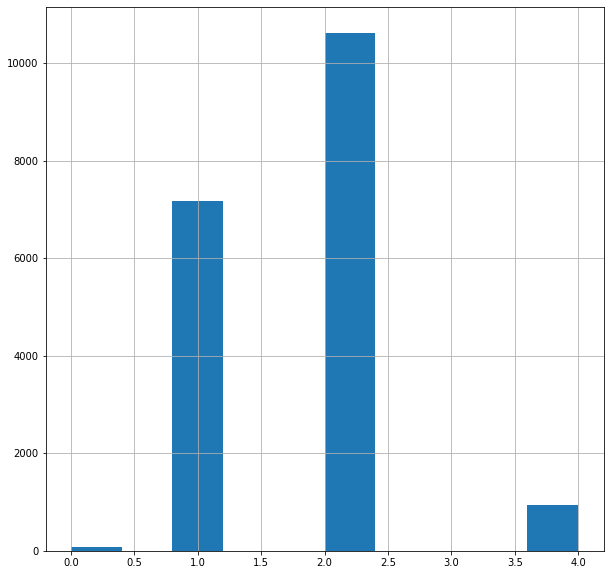

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
train_dataframe['pet_category'].hist()
plt.show()

In [12]:
train_dataframe.groupby(['breed_category']).count()['pet_id'] * 100 /train_dataframe.shape[0]

breed_category
0.0    47.785919
1.0    44.371881
2.0     7.842200
Name: pet_id, dtype: float64

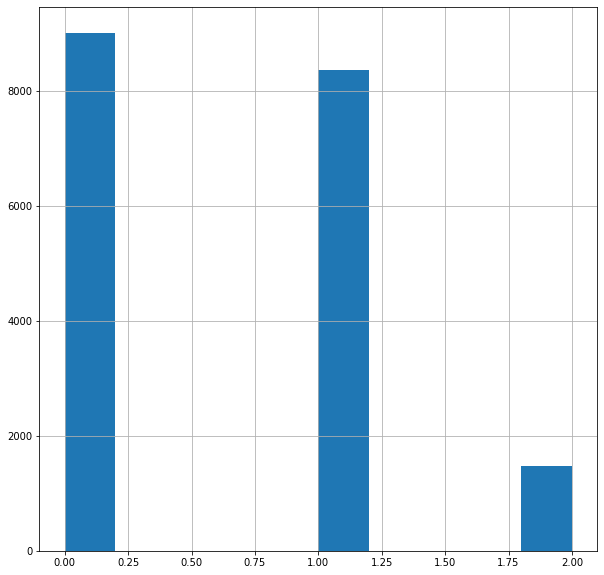

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
train_dataframe['breed_category'].hist()
plt.show()

**Class imbalance is present for both the pet and breed category.**

## **UNIVARIATE ANALYSIS**

### **PET_ID**

In [ ]:
train_dataframe.shape[0],train_dataframe['pet_id'].apply( lambda x:x.split('_')[0] ).unique().shape,train_dataframe['pet_id'].apply( lambda x:x.split('_')[1] ).unique().shape

(18834, (1,), (18834,))

In [ ]:
train_dataframe['id'] = train_dataframe['pet_id'].apply( lambda x:int(x.split('_')[1]) )
train_dataframe.corr('spearman')

,condition,length(m),height(cm),X1,X2,breed_category,pet_category,id
condition,1.000000,-0.011148,-0.011209,0.313433,0.387083,-0.520561,-0.055387,0.006237
length(m),-0.011148,1.000000,-0.004445,-0.002912,-0.010744,0.007264,-0.006771,0.003660
height(cm),-0.011209,-0.004445,1.000000,-0.002566,-0.007919,0.012328,-0.003042,0.007736
X1,0.313433,-0.002912,-0.002566,1.000000,0.634684,0.202997,-0.178729,-0.013505
X2,0.387083,-0.010744,-0.007919,0.634684,1.000000,0.062327,-0.055310,-0.005816
breed_category,-0.520561,0.007264,0.012328,0.202997,0.062327,1.000000,0.035022,-0.009792
pet_category,-0.055387,-0.006771,-0.003042,-0.178729,-0.055310,0.035022,1.000000,0.010079
id,0.006237,0.003660,0.007736,-0.013505,-0.005816,-0.009792,0.010079,1.000000


### **HEIGHT,LENGTH**

In [ ]:
train_dataframe['height(cm)'].min(),train_dataframe['height(cm)'].max()

(5.0, 50.0)

In [ ]:
for col in ['height(cm)','length(m)']:
  for pet_category in train_dataframe['pet_category'].unique():
    df = train_dataframe[train_dataframe.pet_category == pet_category]
    print(col," ",pet_category," ",df[col].min()," ",df[col].max())

height(cm)   1   5.01   49.99
height(cm)   2   5.0   50.0
height(cm)   4   5.02   49.99
height(cm)   0   5.4   49.34
length(m)   1   0.0   1.0
length(m)   2   0.0   1.0
length(m)   4   0.0   1.0
length(m)   0   0.02   0.99


In [ ]:
train_dataframe_height = train_dataframe[train_dataframe.pet_category == 0]

In [ ]:
train_dataframe_height.shape

(88, 11)

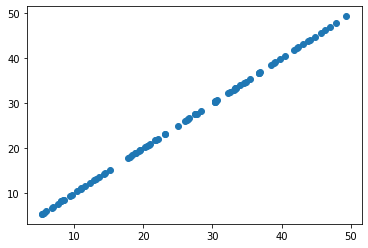

In [ ]:
# train_dataframe_height['height(cm)'].hist()
import matplotlib.pyplot as plt
plt.scatter(train_dataframe_height['height(cm)'],train_dataframe_height['height(cm)'])

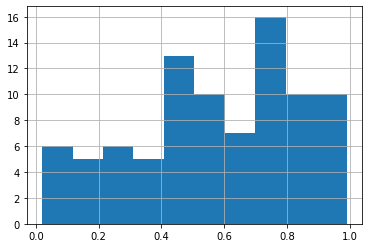

In [ ]:
train_dataframe_height['length(m)'].hist()

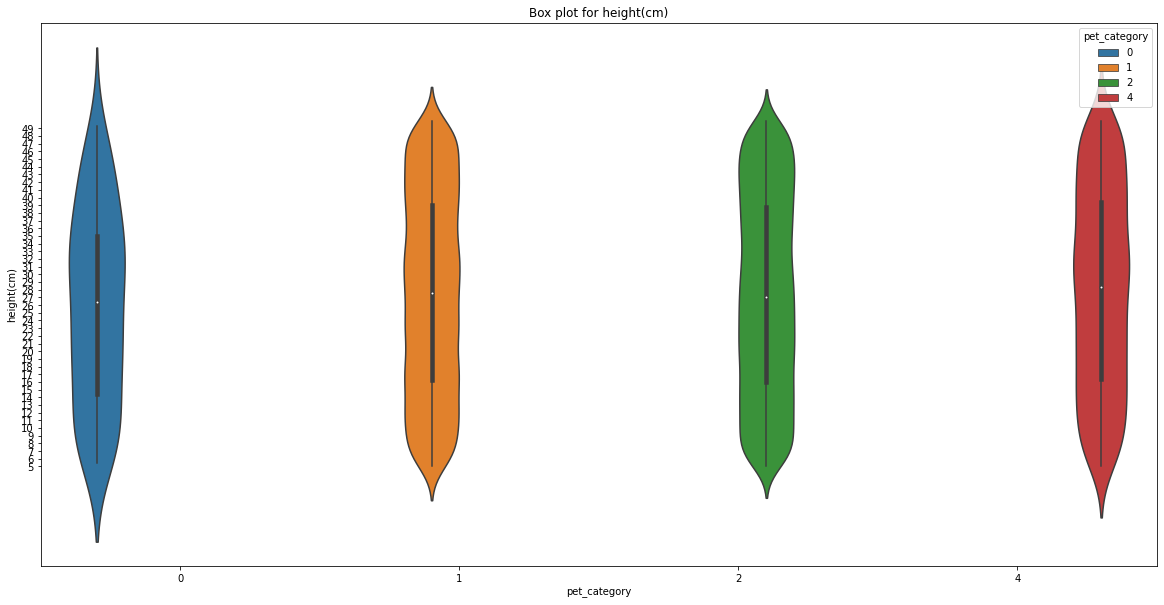

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 10))
sns.violinplot(x='pet_category',y='height(cm)', data=train_dataframe,hue='pet_category')\
    .set(yticks=np.arange(5,50,1),title='Box plot for height(cm)')
plt.show()

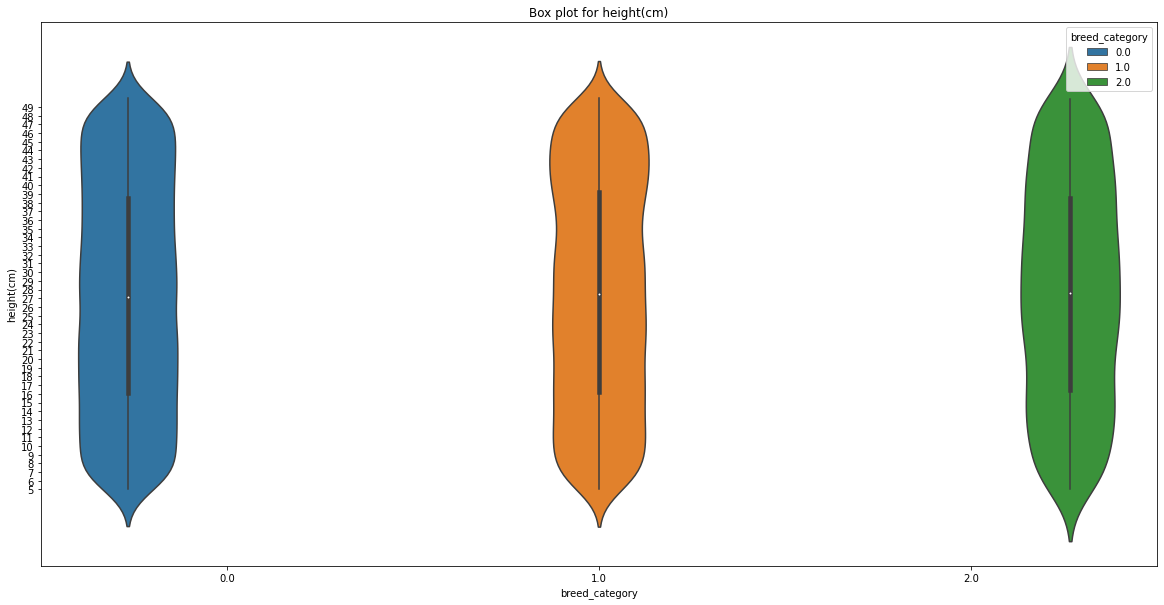

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 10))
sns.violinplot(x='breed_category',y='height(cm)', data=train_dataframe,hue='breed_category')\
    .set(yticks=np.arange(5,50,1),title='Box plot for height(cm)')
plt.show()

In [ ]:
train_dataframe['length(m)'].min(),train_dataframe['length(m)'].max()

(0.0, 1.0)

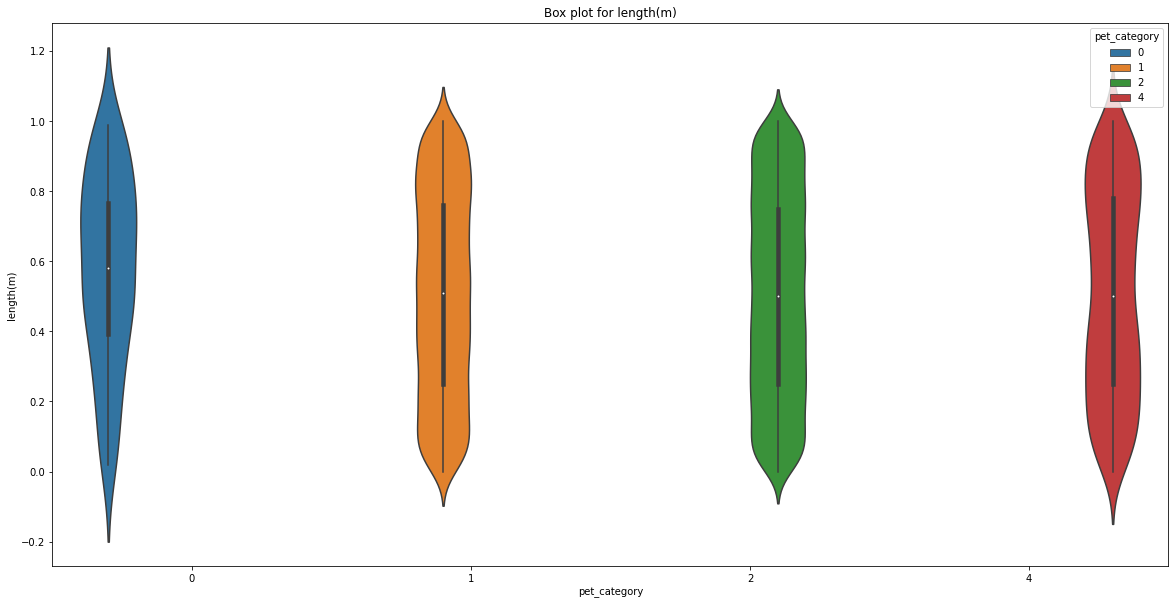

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 10))
sns.violinplot(x='pet_category',y='length(m)', data=train_dataframe,hue='pet_category')\
    .set(title='Box plot for length(m)')
plt.show()
# yticks=np.arange(5,50,1),

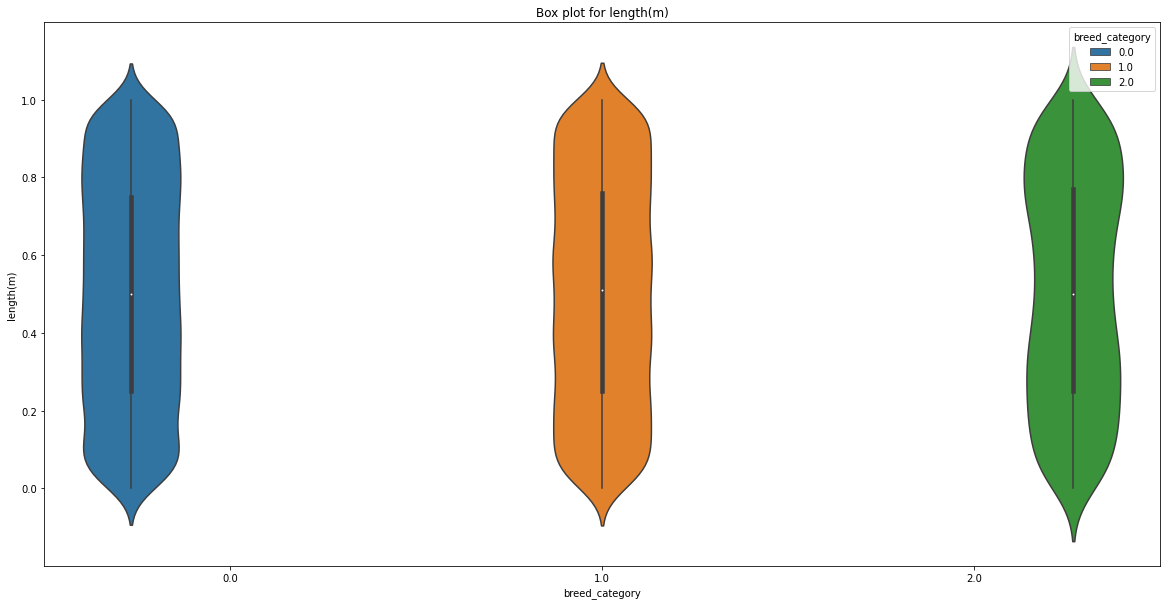

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 10))
sns.violinplot(x='breed_category',y='length(m)', data=train_dataframe,hue='breed_category')\
    .set(title='Box plot for length(m)')
plt.show()

**Height and Length do no vary significantly across each of the classes of pet and breed.**

### **X1,X2**

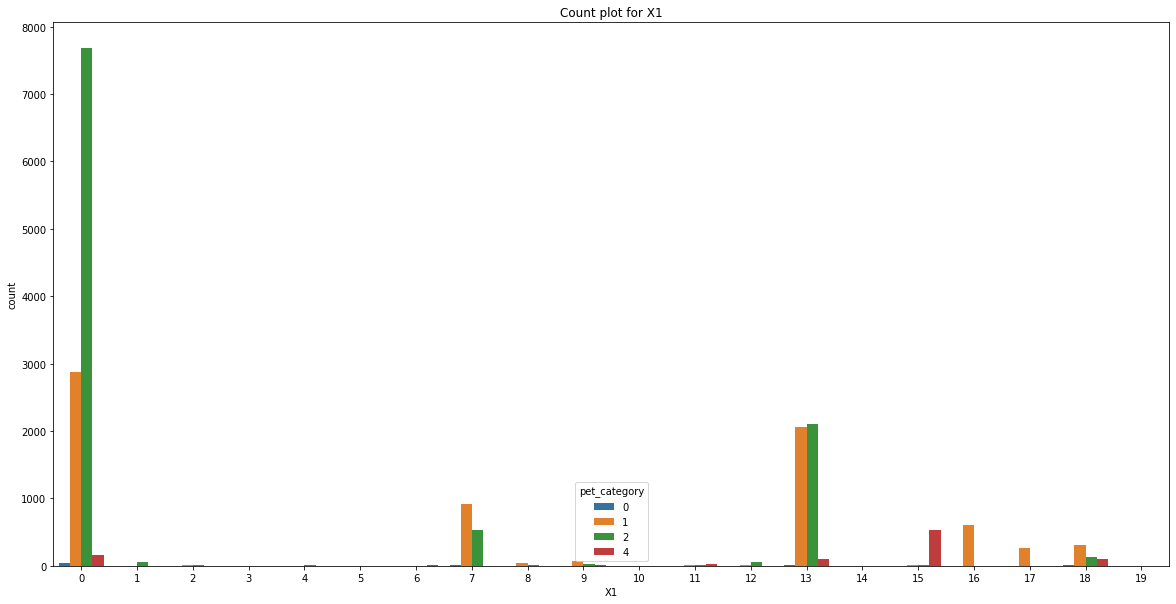

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 10))
sns.countplot(x='X1', data=train_dataframe,hue='pet_category')\
    .set(title='Count plot for X1')
plt.show()

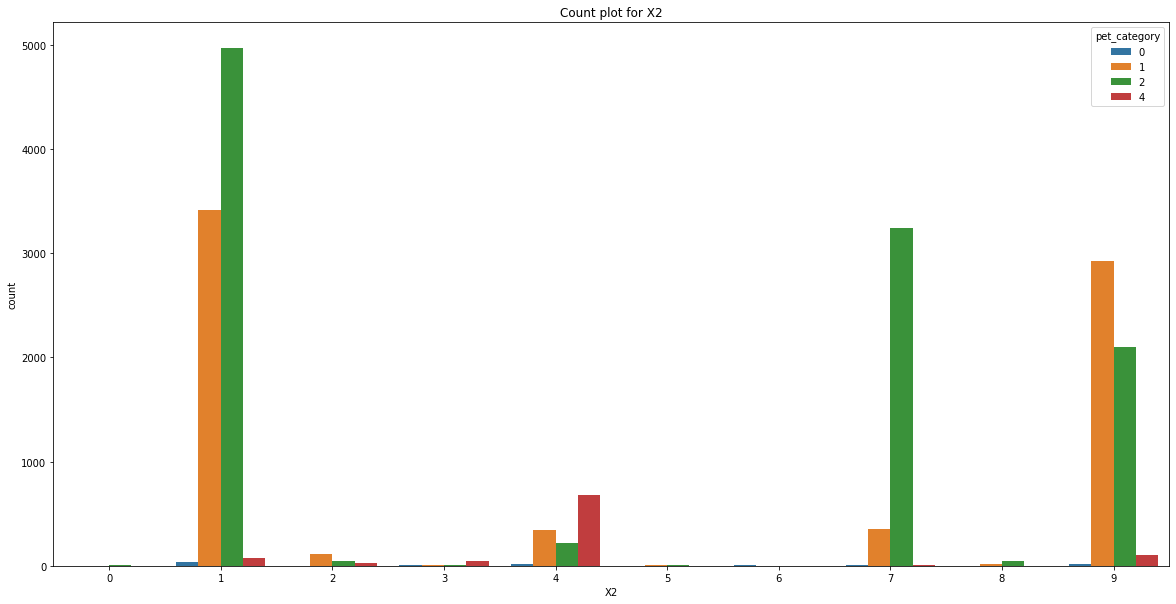

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 10))
sns.countplot(x='X2', data=train_dataframe,hue='pet_category')\
    .set(title='Count plot for X2')
plt.show()

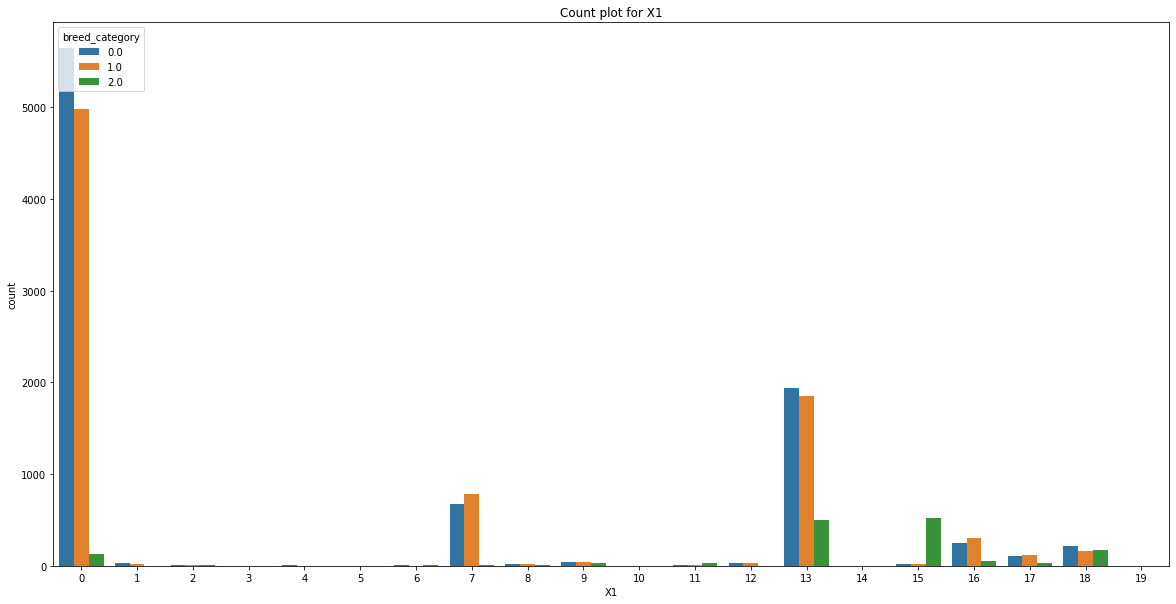

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 10))
sns.countplot(x='X1', data=train_dataframe,hue='breed_category')\
    .set(title='Count plot for X1')
plt.show()

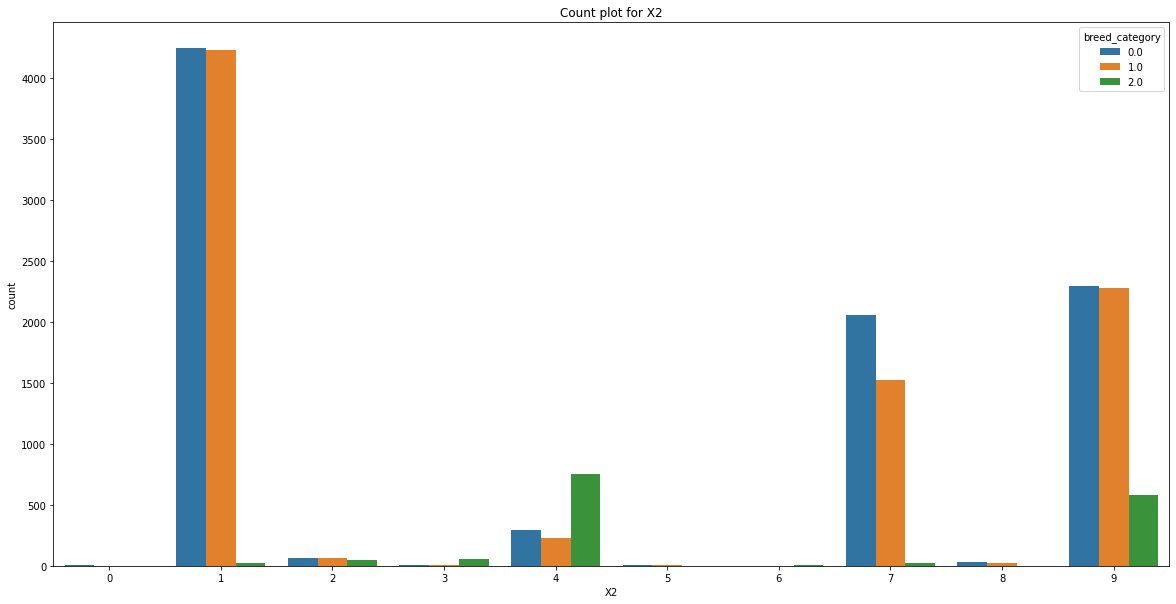

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 10))
sns.countplot(x='X2', data=train_dataframe,hue='breed_category')\
    .set(title='Count plot for X2')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


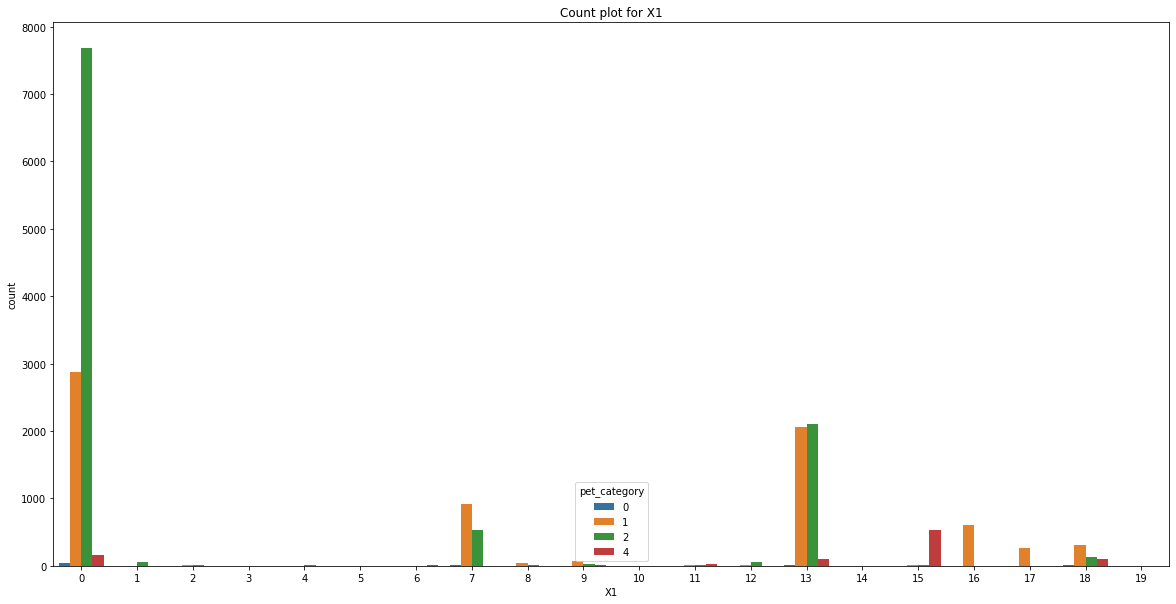

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 10))
sns.countplot(x='X1', data=train_dataframe,hue='pet_category')\
    .set(title='Count plot for X1')
plt.show()

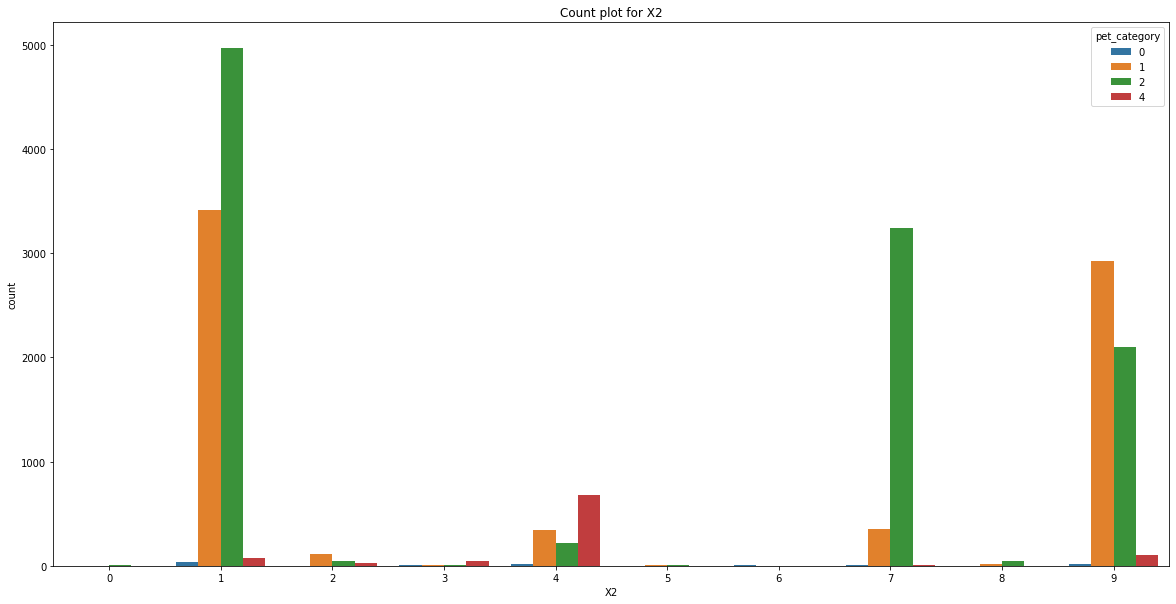

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 10))
sns.countplot(x='X2', data=train_dataframe,hue='pet_category')\
    .set(title='Count plot for X2')
plt.show()

**X1 and X2 vary significantly across various classes of pet and breed.**

### **CONDITION**

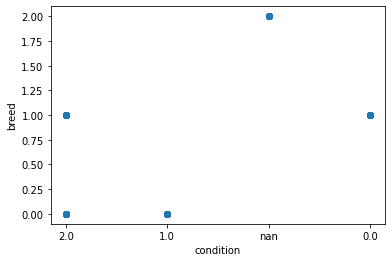

In [ ]:
import matplotlib.pyplot as plt

condition_feature = train_dataframe['condition'].apply(str)

plt.scatter(condition_feature,y_breed_category)
plt.xlabel('condition')
plt.ylabel('breed')
plt.show()

In [ ]:
train_dataframe['condition'] = train_dataframe['condition'].apply(lambda x: 3.0 if np.isnan(x) else x )

In [ ]:
test_dataframe['condition'] = test_dataframe['condition'].apply(lambda x: 3.0 if np.isnan(x) else x )

In [ ]:
for col in X_train_breed.columns:
  print(col,any(X_train_breed[col].isna()))
  print(col,any(X_train_breed[col].isnull()))

**All NAN values are mapping to breed category 2, so a new category 3 can be created for condition feature.**

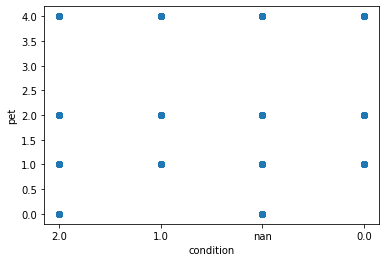

In [ ]:
import matplotlib.pyplot as plt

condition_feature = train_dataframe['condition'].apply(str)
plt.scatter(condition_feature,y_pet_category)
plt.xlabel('condition')
plt.ylabel('pet')
plt.show()

**NAN values of condition feature are mapped to all pet categories**

### **COLOR_TYPE**

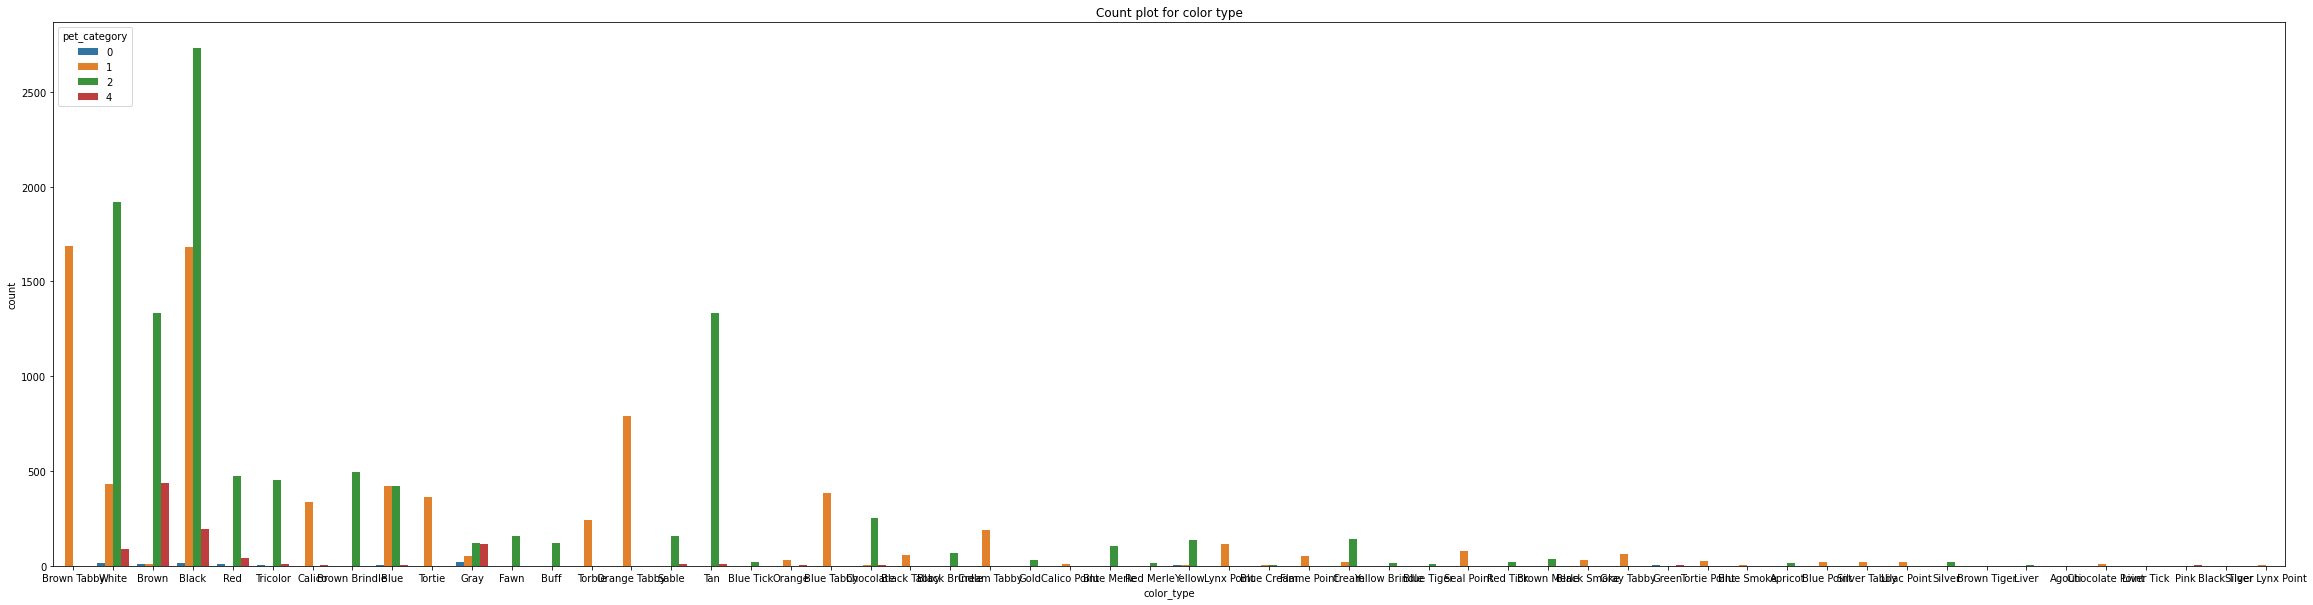

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(40, 10))
sns.countplot(x='color_type', data=train_dataframe,hue='pet_category')\
    .set(title='Count plot for color type')
plt.show()

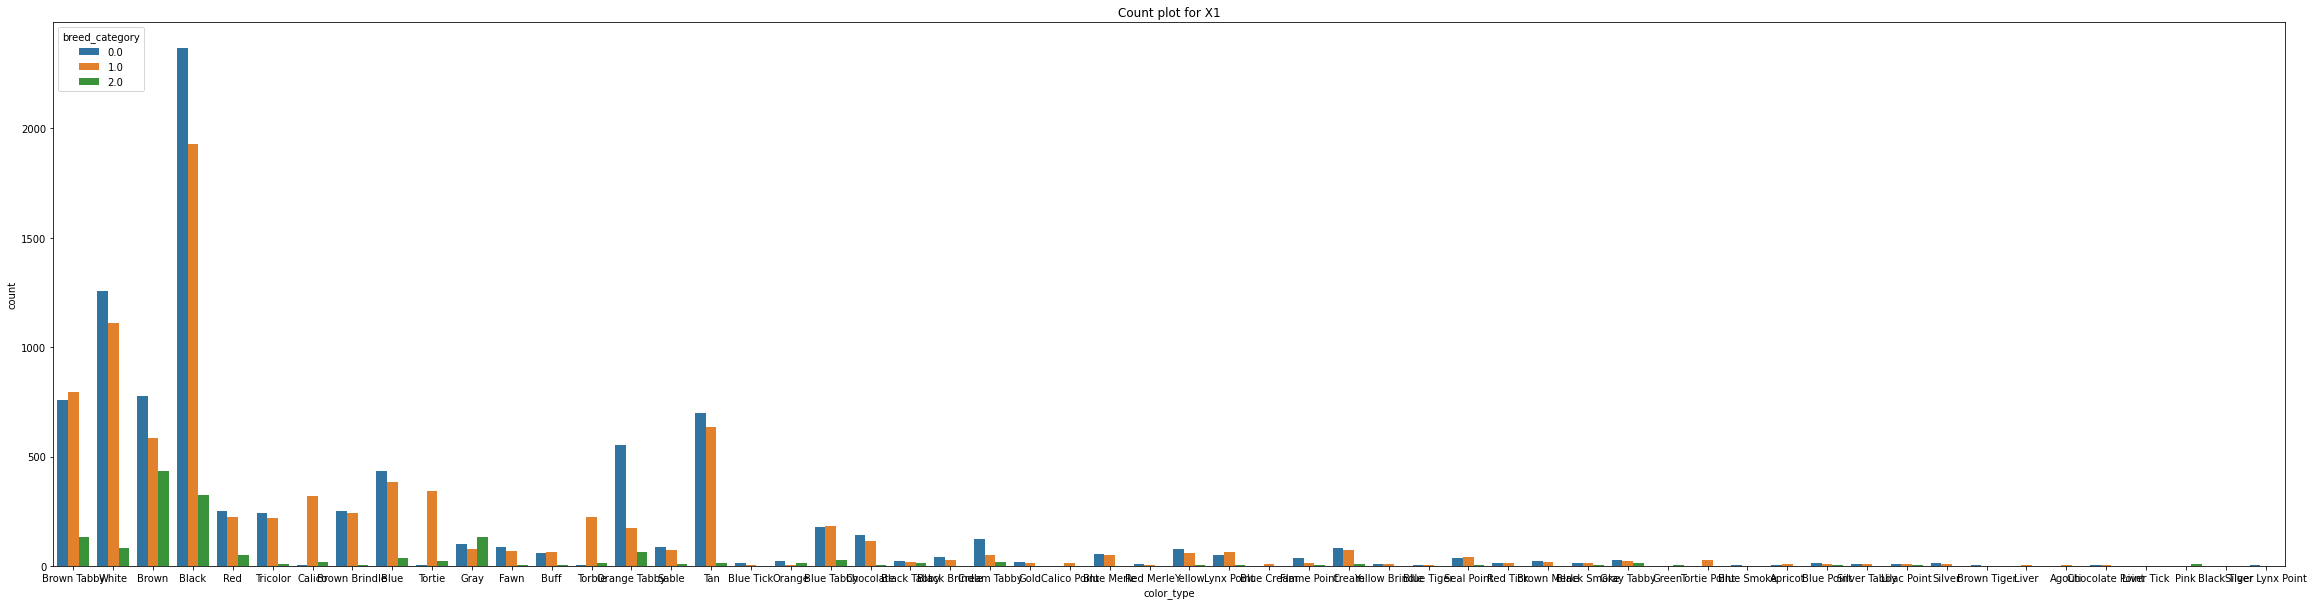

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(40, 10))
sns.countplot(x='color_type', data=train_dataframe,hue='breed_category')\
    .set(title='Count plot for X1')
plt.show()

**Significant variation of color type for the various classes of pet and breed can be observed.**

## **BIVARIATE ANALYSIS**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


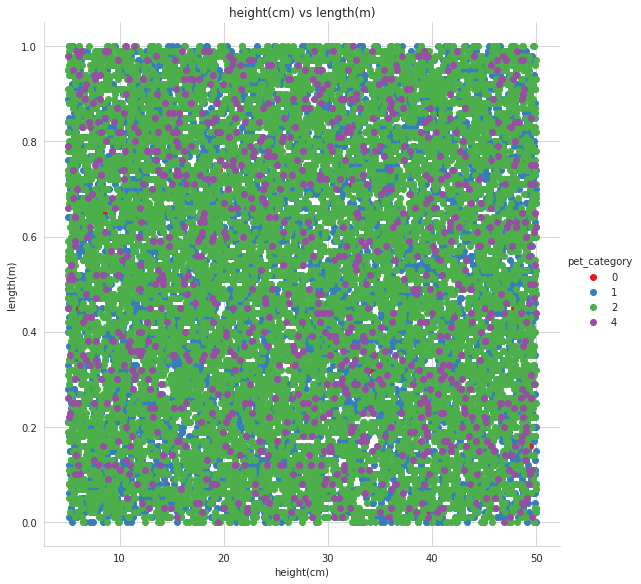

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid");
sns.FacetGrid(train_dataframe,hue="pet_category", size=8,palette="Set1") \
   .map(plt.scatter, "height(cm)", "length(m)") \
   .set(title='height(cm) vs length(m)')\
   .add_legend();
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


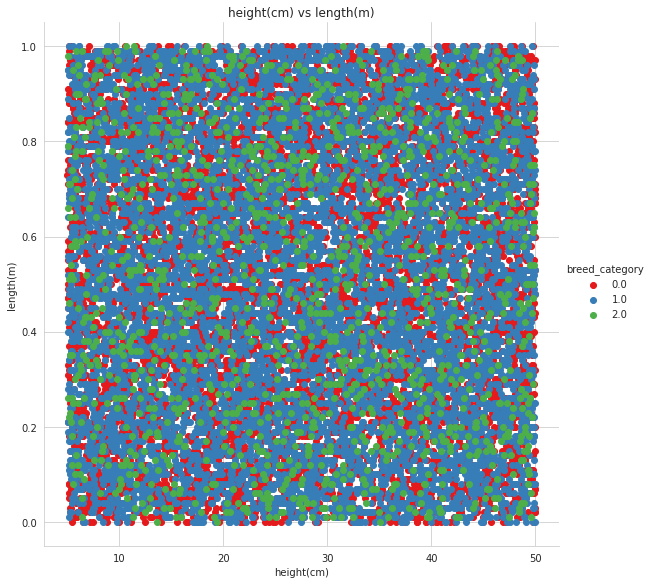

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid");
sns.FacetGrid(train_dataframe,hue="breed_category", size=8,palette="Set1") \
   .map(plt.scatter, "height(cm)", "length(m)") \
   .set(title='height(cm) vs length(m)')\
   .add_legend();
plt.show();

**Height and weight together are not able to distingush the classes.**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


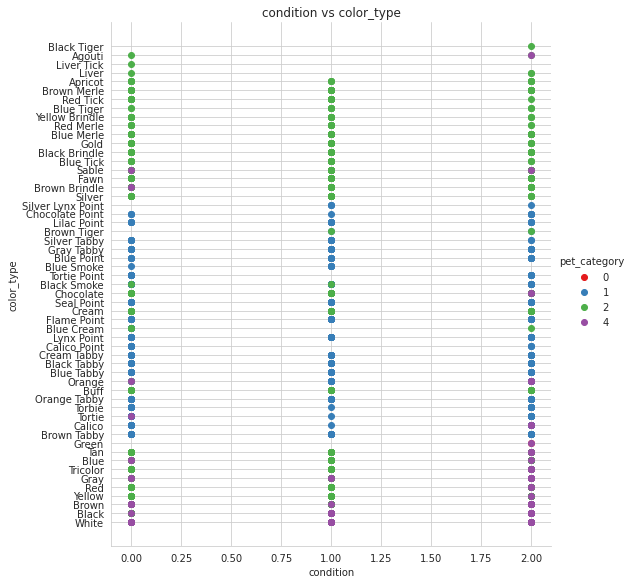

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid");
sns.FacetGrid(train_dataframe,hue="pet_category", size=8,palette="Set1") \
   .map(plt.scatter, "condition", "color_type") \
   .set(title='condition vs color_type')\
   .add_legend();
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


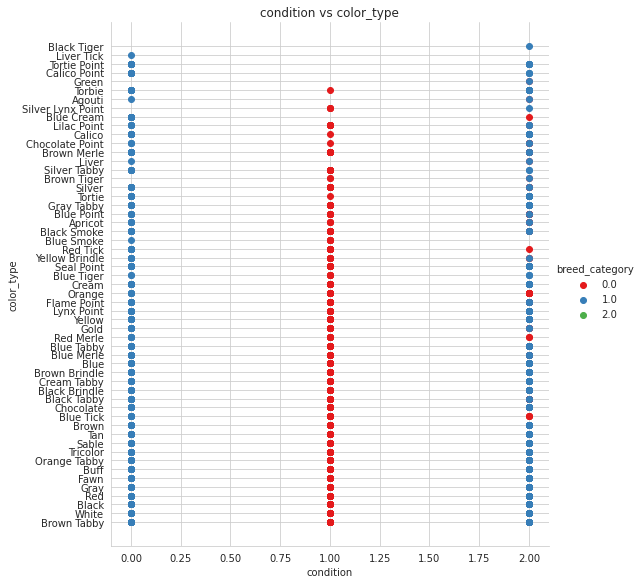

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid");
sns.FacetGrid(train_dataframe,hue="breed_category", size=8,palette="Set1") \
   .map(plt.scatter, "condition", "color_type") \
   .set(title='condition vs color_type')\
   .add_legend();
plt.show();

**Color type and condition together can help in distinguishing the classes**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


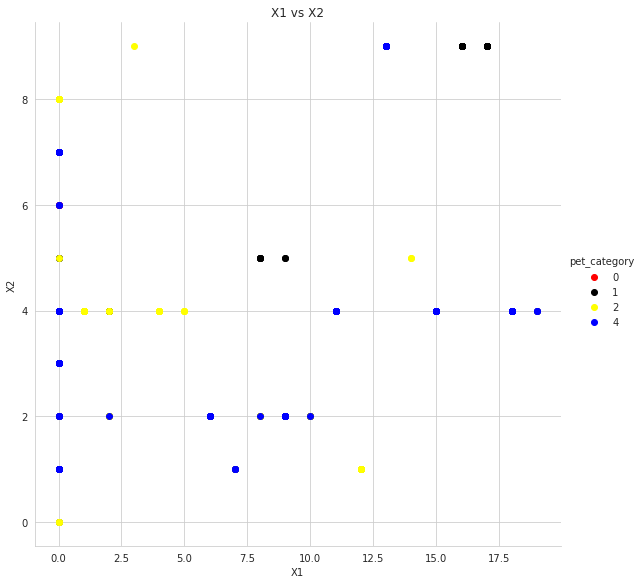

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid");
sns.FacetGrid(train_dataframe,hue="pet_category", size=8,palette=['red','black','yellow','blue']) \
   .map(plt.scatter, "X1", "X2") \
   .set(title='X1 vs X2')\
   .add_legend();
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


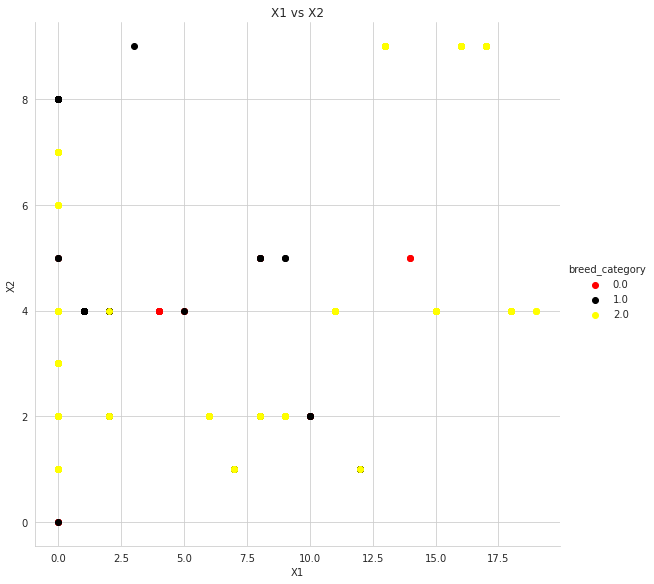

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid");
sns.FacetGrid(train_dataframe,hue="breed_category", size=8,palette=['red','black','yellow']) \
   .map(plt.scatter, "X1", "X2") \
   .set(title='X1 vs X2')\
   .add_legend();
plt.show();

# **FEATURE ENGINEERING**

In [ ]:
import pandas as pd

train_dataframe_fe = pd.read_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/Dataset/train.csv')
train_dataframe_fe.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [ ]:
import pandas as pd

test_dataframe_fe = pd.read_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/Dataset/test.csv')
test_dataframe_fe.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [ ]:
y_train_breed = train_dataframe_fe['breed_category'].values
y_train_pet = train_dataframe_fe['pet_category'].values
# train_dataframe = train_dataframe.drop(columns=['breed_category','pet_category'])

In [ ]:
train_dataframe_fe['X1'].unique(),train_dataframe_fe['X2'].unique()

(array([13, 15,  0, 18,  7, 16, 11,  9, 12, 17,  2,  8,  3,  1,  4, 10,  6,
         5, 19, 14]), array([9, 4, 1, 7, 6, 2, 8, 3, 5, 0]))

In [ ]:
import pandas as pd

train_dataframe_fe = pd.read_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/Dataset/train_fe.csv')
train_dataframe_fe.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,color_type_1,color_type_2,length_height_ratio,length_height_mul,issue_year,issue_day,issue_month,listing_year,listing_day,listing_month,X1_X2,issue_day_of_the_week,listing_day_of_the_week,issue_listing_day_diff,issue_listing_seconds_diff,id,color_type_1_condition,color_type_2_condition,color_type_1_X1,color_type_2_X1,color_type_1_X2,color_type_2_X2,condition_X1,condition_X2,issue_season_number,listing_season_number,color_type_1_X1_condition,color_type_2_X1_condition,color_type_1_X2_condition,color_type_2_X2_condition
0,2016-07-10 00:00:00,2016-09-21 16:25:00,2,Brown Tabby,0.80,7.78,13,9,0.0,1,Brown,Tabby,10.282776,0.062240,2016,10,7,2016,21,9,13 9,6,2,73,59100,69903,Brown 2.0,Tabby 2.0,Brown 13,Tabby 13,Brown 9,Tabby 9,2 13,2 9,1,2,Brown 13 2,Tabby 13 2,Brown 9 2,Tabby 9 2
1,2013-11-21 00:00:00,2018-12-27 17:47:00,1,White,0.72,14.19,13,9,0.0,2,White,None,5.073996,0.102168,2013,21,11,2018,27,12,13 9,3,3,1862,64020,66892,White 1.0,None 1.0,White 13,None 13,White 9,None 9,1 13,1 9,2,3,White 13 1,None 13 1,White 9 1,None 9 1
2,2014-09-28 00:00:00,2016-10-19 08:24:00,3,Brown,0.15,40.90,15,4,2.0,4,Brown,None,0.366748,0.061350,2014,28,9,2016,19,10,15 4,6,2,752,30240,69750,Brown nan,None nan,Brown 15,None 15,Brown 4,None 4,3 15,3 4,2,2,Brown 15 3,None 15 3,Brown 4 3,None 4 3
3,2016-12-31 00:00:00,2019-01-25 18:30:00,1,White,0.62,17.82,0,1,0.0,2,White,None,3.479237,0.110484,2016,31,12,2019,25,1,0 1,5,4,755,66600,71623,White 1.0,None 1.0,White 0,None 0,White 1,None 1,1 0,1 1,3,0,White 0 1,None 0 1,White 1 1,None 1 1
4,2017-09-28 00:00:00,2017-11-19 09:38:00,2,Black,0.50,11.06,18,4,0.0,1,Black,None,4.520796,0.055300,2017,28,9,2017,19,11,18 4,3,6,52,34680,57969,Black 2.0,None 2.0,Black 18,None 18,Black 4,None 4,2 18,2 4,2,2,Black 18 2,None 18 2,Black 4 2,None 4 2


In [ ]:
train_dataframe['id'] = train_dataframe['pet_id'].apply(lambda x: int(x.split('_')[1]))

In [ ]:
train_dataframe_fe['id'] = train_dataframe['id']

In [ ]:
test_dataframe_fe = pd.read_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/Dataset/test_fe.csv')

In [ ]:
test_dataframe = pd.read_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/Dataset/test.csv')

In [ ]:
test_dataframe_fe['id'] = test_dataframe['pet_id'].apply(lambda x: int(x.split('_')[1]))

### **COLOR TYPE**

In [ ]:
train_dataframe_fe['color_type_1'] = train_dataframe_fe['color_type'].apply(lambda x:x.split()[0])
train_dataframe_fe['color_type_2'] = train_dataframe_fe['color_type'].apply(lambda x: 'None' if len(x.split()) < 2 else x.split()[1] )

In [ ]:
test_dataframe_fe['color_type_1'] = test_dataframe_fe['color_type'].apply(lambda x:x.split()[0])
test_dataframe_fe['color_type_2'] = test_dataframe_fe['color_type'].apply(lambda x: 'None' if len(x.split()) < 2 else x.split()[1] )

### **HEIGHT LENGTH**

In [ ]:
length_height_ratio = []

for i in range(train_dataframe_fe.shape[0]):
  length = train_dataframe_fe['length(m)'][i]
  height = train_dataframe_fe['height(cm)'][i] / 100
  length_height_ratio.append(length/height)

length_height_mul = []

for i in range(train_dataframe_fe.shape[0]):
  length = train_dataframe_fe['length(m)'][i]
  height = train_dataframe_fe['height(cm)'][i] / 100
  length_height_mul.append(length*height)

In [ ]:
train_dataframe_fe['length_height_ratio'] = length_height_ratio
train_dataframe_fe['length_height_mul'] = length_height_mul

In [ ]:
length_height_ratio = []

for i in range(test_dataframe_fe.shape[0]):
  length = test_dataframe_fe['length(m)'][i]
  height = test_dataframe_fe['height(cm)'][i] / 100
  length_height_ratio.append(length/height)

length_height_mul = []

for i in range(test_dataframe_fe.shape[0]):
  length = test_dataframe_fe['length(m)'][i]
  height = test_dataframe_fe['height(cm)'][i] / 100
  length_height_mul.append(length*height)

In [ ]:
test_dataframe_fe['length_height_ratio'] = length_height_ratio
test_dataframe_fe['length_height_mul'] = length_height_mul

### **CONDITION**

In [ ]:
import numpy as np

train_dataframe_fe['condition'] = train_dataframe_fe['condition'].apply(lambda x: 3 if np.isnan(x) else int(x))
train_dataframe_fe = train_dataframe_fe.drop(columns = ['pet_id'])

In [ ]:
train_dataframe_fe['condition'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
18829    False
18830    False
18831    False
18832    False
18833    False
Name: condition, Length: 18834, dtype: bool

In [ ]:
train_dataframe_fe['condition'].unique()

array([2, 1, 3, 0])

In [ ]:
test_dataframe_fe['condition'] = test_dataframe_fe['condition'].apply(lambda x: 3 if np.isnan(x) else int(x))
test_dataframe_fe = test_dataframe_fe.drop(columns = ['pet_id'])

### **ISSUE DATE, LISTING DATE**

In [ ]:
# split date into year month and date 

issue_months = []
issue_days = []
issue_years = []
for i in range(train_dataframe_fe['issue_date'].shape[0]):
  issue_date = train_dataframe_fe['issue_date'][i]
  issue_month = int(issue_date.split()[0].split('-')[1])
  issue_months.append(issue_month)

  issue_day = int(issue_date.split()[0].split('-')[2])
  issue_days.append(issue_day)

  issue_year = int(issue_date.split()[0].split('-')[0])
  issue_years.append(issue_year)


In [ ]:
train_dataframe_fe['issue_year'] = issue_years
train_dataframe_fe['issue_day'] = issue_days
train_dataframe_fe['issue_month'] = issue_months

In [ ]:
listing_months = []
listing_days = []
listing_years = []
for i in range(train_dataframe_fe['listing_date'].shape[0]):
  listing_date = train_dataframe_fe['listing_date'][i]
  listing_month = int(listing_date.split()[0].split('-')[1])
  listing_months.append(listing_month)

  listing_day = int(listing_date.split()[0].split('-')[2])
  listing_days.append(listing_day)

  listing_year = int(listing_date.split()[0].split('-')[0])
  listing_years.append(listing_year)

In [ ]:
train_dataframe_fe['listing_year'] = listing_years
train_dataframe_fe['listing_day'] = listing_days
train_dataframe_fe['listing_month'] = listing_months

In [ ]:
listing_months = []
listing_days = []
listing_years = []
for i in range(test_dataframe_fe['listing_date'].shape[0]):
  listing_date = test_dataframe_fe['listing_date'][i]
  listing_month = int(listing_date.split()[0].split('-')[1])
  listing_months.append(listing_month)

  listing_day = int(listing_date.split()[0].split('-')[2])
  listing_days.append(listing_day)

  listing_year = int(listing_date.split()[0].split('-')[0])
  listing_years.append(listing_year)

issue_months = []
issue_days = []
issue_years = []
for i in range(test_dataframe_fe['issue_date'].shape[0]):
  issue_date = test_dataframe_fe['issue_date'][i]
  issue_month = int(issue_date.split()[0].split('-')[1])
  issue_months.append(issue_month)

  issue_day = int(issue_date.split()[0].split('-')[2])
  issue_days.append(issue_day)

  issue_year = int(issue_date.split()[0].split('-')[0])
  issue_years.append(issue_year)

test_dataframe_fe['listing_year'] = listing_years
test_dataframe_fe['listing_day'] = listing_days
test_dataframe_fe['listing_month'] = listing_months

test_dataframe_fe['issue_year'] = issue_years
test_dataframe_fe['issue_day'] = issue_days
test_dataframe_fe['issue_month'] = issue_months

In [ ]:
#diff between dates
from datetime import datetime

issue_listing_day_diff = []
issue_listing_seconds_diff = []

for i in range(train_dataframe_fe.shape[0]):
  listing_date = datetime.strptime(train_dataframe_fe['listing_date'][i],'%Y-%m-%d %H:%M:%S')
  issue_date   = datetime.strptime(train_dataframe_fe['issue_date'][i],'%Y-%m-%d %H:%M:%S')
  diff_dates = listing_date - issue_date
  issue_listing_day_diff.append(diff_dates.days)
  issue_listing_seconds_diff.append(diff_dates.seconds)
  
train_dataframe_fe['issue_listing_day_diff'] = issue_listing_day_diff
train_dataframe_fe['issue_listing_seconds_diff'] = issue_listing_seconds_diff

In [ ]:
from datetime import datetime

issue_listing_day_diff = []
issue_listing_seconds_diff = []

for i in range(test_dataframe_fe.shape[0]):
  listing_date = datetime.strptime(test_dataframe_fe['listing_date'][i],'%Y-%m-%d %H:%M:%S')
  issue_date   = datetime.strptime(test_dataframe_fe['issue_date'][i],'%Y-%m-%d %H:%M:%S')
  diff_dates = listing_date - issue_date
  issue_listing_day_diff.append(diff_dates.days)
  issue_listing_seconds_diff.append(diff_dates.seconds)
  
test_dataframe_fe['issue_listing_day_diff'] = issue_listing_day_diff
test_dataframe_fe['issue_listing_seconds_diff'] = issue_listing_seconds_diff

In [ ]:
from datetime import datetime
#day of week
train_dataframe_fe['issue_day_of_the_week'] = train_dataframe_fe['issue_date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').weekday() )
test_dataframe_fe['issue_day_of_the_week']  = test_dataframe_fe['issue_date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').weekday() )

train_dataframe_fe['listing_day_of_the_week'] = train_dataframe_fe['listing_date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').weekday() )
test_dataframe_fe['listing_day_of_the_week']  = test_dataframe_fe['listing_date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').weekday() )

In [ ]:
train_dataframe_fe =  train_dataframe_fe.drop(columns=['issue_season_number','issue_season_number'])
test_dataframe_fe =  train_dataframe_fe.drop(columns=['issue_season_number','issue_season_number'])

In [ ]:
#quarter of year 
#0,1,2
#month//3

train_dataframe_fe['issue_quarter'] = train_dataframe_fe['issue_date'].apply(lambda x: (int(x.split()[0].split('-')[1])-1)//3 )
test_dataframe_fe['issue_quarter'] = test_dataframe_fe['issue_date'].apply(lambda x: (int(x.split()[0].split('-')[1])-1)//3 )

train_dataframe_fe['listing_quarter'] = train_dataframe_fe['listing_date'].apply(lambda x: (int(x.split()[0].split('-')[1])-1)//3 )
test_dataframe_fe['listing_quarter'] = test_dataframe_fe['listing_date'].apply(lambda x: (int(x.split()[0].split('-')[1])-1)//3 )

In [ ]:
#hour of the day
train_dataframe_fe['listing_hour_of_the_day'] = train_dataframe_fe['listing_date'].apply(lambda x: int(x.split()[1].split(':')[0]))
test_dataframe_fe['listing_hour_of_the_day']  = test_dataframe_fe['listing_date'].apply(lambda x: int(x.split()[1].split(':')[0]))

In [ ]:
train_dataframe_fe = train_dataframe_fe.drop(columns=['week_of_month'])

In [ ]:
#week of month
train_dataframe_fe['listing_week_of_month'] = train_dataframe_fe['listing_day'].apply(lambda x: int(x)//7)
test_dataframe_fe['listing_week_of_month']  = test_dataframe_fe['listing_day'].apply(lambda x: int(x)//7)

train_dataframe_fe['issue_week_of_month'] = train_dataframe_fe['issue_day'].apply(lambda x: int(x)//7)
test_dataframe_fe['issue_week_of_month']  = test_dataframe_fe['issue_day'].apply(lambda x: int(x)//7)

### **X1,X2**

In [ ]:
train_dataframe_fe['X1_X2'] = train_dataframe_fe['X1'].apply(str)+" "+train_dataframe_fe['X2'].apply(str)
test_dataframe_fe['X1_X2'] = test_dataframe_fe['X1'].apply(str)+" "+test_dataframe_fe['X2'].apply(str)

In [ ]:
train_dataframe_fe['X1_X2'].unique().shape,test_dataframe_fe['X1_X2'].unique().shape

((31,), (28,))

In [ ]:
train_dataframe_fe['X1_freq'] = train_dataframe_fe['X1'].map(train_dataframe_fe.groupby(['X1']).count()['color_type'].to_dict())
train_dataframe_fe['X2_freq'] = train_dataframe_fe['X2'].map(train_dataframe_fe.groupby(['X2']).count()['color_type'].to_dict())

In [ ]:
test_dataframe_fe['X1_freq'] = test_dataframe_fe['X1'].map(test_dataframe_fe.groupby(['X1']).count()['color_type'].to_dict())
test_dataframe_fe['X2_freq'] = test_dataframe_fe['X2'].map(test_dataframe_fe.groupby(['X2']).count()['color_type'].to_dict())

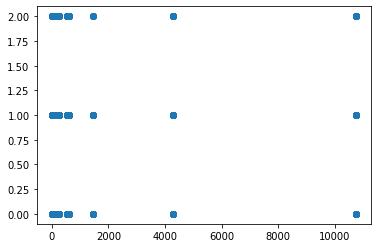

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train_dataframe_fe['X1_freq'],train_dataframe_fe['breed_category'])

### **COMBINATION OF EXISTING FEATURES**

In [ ]:
#condition and color type 
train_dataframe_fe['color_type_1_condition'] = train_dataframe_fe['color_type_1'] + " " +train_dataframe['condition'].apply(str)
train_dataframe_fe['color_type_2_condition'] = train_dataframe_fe['color_type_2'] + " " +train_dataframe['condition'].apply(str)

In [ ]:
test_dataframe_fe['color_type_1_condition'] = test_dataframe_fe['color_type_1'] + " " +test_dataframe['condition'].apply(str)
test_dataframe_fe['color_type_2_condition'] = test_dataframe_fe['color_type_2'] + " " +test_dataframe['condition'].apply(str)

In [ ]:
train_dataframe_fe['color_type_2_condition'].unique(),, test_dataframe_fe['color_type_2_condition'].unique()

(array(['Tabby 2.0', 'None 1.0', 'None nan', 'None 2.0', 'None 0.0',
        'Brindle 2.0', 'Tabby 1.0', 'Tabby 0.0', 'Tabby nan', 'Tick 1.0',
        'Brindle 1.0', 'Point 2.0', 'Merle 1.0', 'Brindle 0.0',
        'Merle 2.0', 'Point 1.0', 'Point 0.0', 'Cream 0.0', 'Tiger 1.0',
        'Tick 0.0', 'Merle 0.0', 'Smoke 0.0', 'Smoke 1.0', 'Smoke 2.0',
        'Tick 2.0', 'Point nan', 'Tiger 2.0', 'Brindle nan', 'Cream 2.0',
        'Smoke nan', 'Tiger 0.0', 'Lynx 1.0', 'Merle nan', 'Lynx 2.0'],
       dtype=object),
 array(['None 0.0', 'Tabby 1.0', 'None 1.0', 'Tabby 0.0', 'None 2.0',
        'None nan', 'Brindle 2.0', 'Brindle 0.0', 'Merle 2.0', 'Point 1.0',
        'Brindle 1.0', 'Tabby nan', 'Tabby 2.0', 'Point 2.0', 'Merle 1.0',
        'Point 0.0', 'Merle 0.0', 'Tick 0.0', 'Smoke 1.0', 'Cream 0.0',
        'Tick 1.0', 'Point nan', 'Lynx 0.0', 'Smoke 2.0', 'Smoke 0.0',
        'Tiger 1.0', 'Tick 2.0', 'Lynx nan', 'Smoke nan', 'Cream 2.0'],
       dtype=object))

In [ ]:
#color type and x1 and x2
train_dataframe_fe['color_type_1_X1'] = train_dataframe_fe['color_type_1'] + " " +train_dataframe_fe['X1'].apply(str)
train_dataframe_fe['color_type_2_X1'] = train_dataframe_fe['color_type_2'] + " " +train_dataframe_fe['X1'].apply(str)

train_dataframe_fe['color_type_1_X2'] = train_dataframe_fe['color_type_1'] + " " +train_dataframe_fe['X2'].apply(str)
train_dataframe_fe['color_type_2_X2'] = train_dataframe_fe['color_type_2'] + " " +train_dataframe_fe['X2'].apply(str)

In [ ]:
test_dataframe_fe['color_type_1_X1'] = test_dataframe_fe['color_type_1'] + " " +test_dataframe_fe['X1'].apply(str)
test_dataframe_fe['color_type_2_X1'] = test_dataframe_fe['color_type_2'] + " " +test_dataframe_fe['X1'].apply(str)

test_dataframe_fe['color_type_1_X2'] = test_dataframe_fe['color_type_1'] + " " +test_dataframe_fe['X2'].apply(str)
test_dataframe_fe['color_type_2_X2'] = test_dataframe_fe['color_type_2'] + " " +test_dataframe_fe['X2'].apply(str)

In [ ]:
# condition and X1,X2
train_dataframe_fe['condition_X1'] = train_dataframe_fe['condition'].apply(str) + " " +train_dataframe_fe['X1'].apply(str)
train_dataframe_fe['condition_X2'] = train_dataframe_fe['condition'].apply(str) + " " +train_dataframe_fe['X2'].apply(str)

In [ ]:
test_dataframe_fe['condition_X1'] = test_dataframe_fe['condition'].apply(str) + " " +test_dataframe_fe['X1'].apply(str)
test_dataframe_fe['condition_X2'] = test_dataframe_fe['condition'].apply(str) + " " +test_dataframe_fe['X2'].apply(str)

In [ ]:
#color type x1/x2 condition
train_dataframe_fe['color_type_1_X1_condition'] = train_dataframe_fe['color_type_1_X1'] +" "+train_dataframe_fe['condition'].apply(str)
test_dataframe_fe['color_type_1_X1_condition']  = test_dataframe_fe['color_type_1_X1'] +" "+test_dataframe_fe['condition'].apply(str)

train_dataframe_fe['color_type_2_X1_condition'] = train_dataframe_fe['color_type_2_X1'] +" "+train_dataframe_fe['condition'].apply(str)
test_dataframe_fe['color_type_2_X1_condition']  = test_dataframe_fe['color_type_2_X1'] +" "+test_dataframe_fe['condition'].apply(str)


train_dataframe_fe['color_type_1_X2_condition'] = train_dataframe_fe['color_type_1_X2'] +" "+train_dataframe_fe['condition'].apply(str)
test_dataframe_fe['color_type_1_X2_condition']  = test_dataframe_fe['color_type_1_X2'] +" "+test_dataframe_fe['condition'].apply(str)

train_dataframe_fe['color_type_2_X2_condition'] = train_dataframe_fe['color_type_2_X2'] +" "+train_dataframe_fe['condition'].apply(str)
test_dataframe_fe['color_type_2_X2_condition']  = test_dataframe_fe['color_type_2_X2'] +" "+test_dataframe_fe['condition'].apply(str)

In [ ]:
train_dataframe_fe['color_type_X1'] = train_dataframe_fe['color_type']+" "+train_dataframe_fe['X1'].apply(str)
train_dataframe_fe['color_type_X2'] = train_dataframe_fe['color_type']+" "+train_dataframe_fe['X2'].apply(str)

test_dataframe_fe['color_type_X1'] = test_dataframe_fe['color_type']+" "+test_dataframe_fe['X1'].apply(str)
test_dataframe_fe['color_type_X2'] = test_dataframe_fe['color_type']+" "+test_dataframe_fe['X2'].apply(str)

### **FINAL DATAFRAME**

In [ ]:
train_dataframe_fe.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,color_type_1,color_type_2,length_height_ratio,length_height_mul,issue_year,issue_day,issue_month,listing_year,listing_day,listing_month,X1_X2,issue_day_of_the_week,listing_day_of_the_week,issue_listing_day_diff,issue_listing_seconds_diff,id,color_type_1_condition,color_type_2_condition,color_type_1_X1,color_type_2_X1,color_type_1_X2,color_type_2_X2,condition_X1,condition_X2,listing_season_number,color_type_1_X1_condition,color_type_2_X1_condition,color_type_1_X2_condition,color_type_2_X2_condition,listing_hour_of_the_day,color_type_X1,color_type_X2,listing_week_of_month,issue_week_of_month,issue_quarter,listing_quarter
0,2016-07-10 00:00:00,2016-09-21 16:25:00,2,Brown Tabby,0.80,7.78,13,9,0.0,1,Brown,Tabby,10.282776,0.062240,2016,10,7,2016,21,9,13 9,6,2,73,59100,69903,Brown 2.0,Tabby 2.0,Brown 13,Tabby 13,Brown 9,Tabby 9,2 13,2 9,2,Brown 13 2,Tabby 13 2,Brown 9 2,Tabby 9 2,16,Brown Tabby 13,Brown Tabby 9,3,1,2,2
1,2013-11-21 00:00:00,2018-12-27 17:47:00,1,White,0.72,14.19,13,9,0.0,2,White,None,5.073996,0.102168,2013,21,11,2018,27,12,13 9,3,3,1862,64020,66892,White 1.0,None 1.0,White 13,None 13,White 9,None 9,1 13,1 9,3,White 13 1,None 13 1,White 9 1,None 9 1,17,White 13,White 9,3,3,3,3
2,2014-09-28 00:00:00,2016-10-19 08:24:00,3,Brown,0.15,40.90,15,4,2.0,4,Brown,None,0.366748,0.061350,2014,28,9,2016,19,10,15 4,6,2,752,30240,69750,Brown nan,None nan,Brown 15,None 15,Brown 4,None 4,3 15,3 4,2,Brown 15 3,None 15 3,Brown 4 3,None 4 3,8,Brown 15,Brown 4,2,4,2,3
3,2016-12-31 00:00:00,2019-01-25 18:30:00,1,White,0.62,17.82,0,1,0.0,2,White,None,3.479237,0.110484,2016,31,12,2019,25,1,0 1,5,4,755,66600,71623,White 1.0,None 1.0,White 0,None 0,White 1,None 1,1 0,1 1,0,White 0 1,None 0 1,White 1 1,None 1 1,18,White 0,White 1,3,4,3,0
4,2017-09-28 00:00:00,2017-11-19 09:38:00,2,Black,0.50,11.06,18,4,0.0,1,Black,None,4.520796,0.055300,2017,28,9,2017,19,11,18 4,3,6,52,34680,57969,Black 2.0,None 2.0,Black 18,None 18,Black 4,None 4,2 18,2 4,2,Black 18 2,None 18 2,Black 4 2,None 4 2,9,Black 18,Black 4,2,4,2,3


In [ ]:
train_dataframe_fe.to_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/Dataset/train_fe.csv',index = None)

In [ ]:
test_dataframe_fe.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,color_type_1,color_type_2,length_height_ratio,length_height_mul,listing_year,listing_day,listing_month,issue_year,issue_day,issue_month,X1_X2,issue_day_of_the_week,listing_day_of_the_week,issue_listing_day_diff,issue_listing_seconds_diff,id,color_type_1_condition,color_type_2_condition,color_type_1_X1,color_type_2_X1,color_type_1_X2,color_type_2_X2,condition_X1,condition_X2,issue_season_number,listing_season_number,color_type_1_X1_condition,color_type_2_X1_condition,color_type_1_X2_condition,color_type_2_X2_condition,listing_hour_of_the_day,color_type_X1,color_type_X2,week_of_month,listing_week_of_month,issue_week_of_month,issue_quarter,listing_quarter
0,2005-08-17 00:00:00,2017-09-07 15:35:00,0,Black,0.87,42.73,0,7,Black,None,2.036040,0.371751,2017,7,9,2005,17,8,0 7,2,3,4404,56100,75005,Black 0.0,None 0.0,Black 0,None 0,Black 7,None 7,0 0,0 7,2,2,Black 0 0,None 0 0,Black 7 0,None 7 0,15,Black 0,Black 7,1,1,2,2,2
1,2018-11-15 00:00:00,2019-05-08 17:24:00,1,Orange Tabby,0.06,6.71,0,1,Orange,Tabby,0.894188,0.004026,2019,8,5,2018,15,11,0 1,3,2,174,62640,76663,Orange 1.0,Tabby 1.0,Orange 0,Tabby 0,Orange 1,Tabby 1,1 0,1 1,2,1,Orange 0 1,Tabby 0 1,Orange 1 1,Tabby 1 1,17,Orange Tabby 0,Orange Tabby 1,1,1,2,3,1
2,2012-10-11 00:00:00,2018-04-02 16:51:00,1,Black,0.24,41.21,0,7,Black,None,0.582383,0.098904,2018,2,4,2012,11,10,0 7,3,0,1999,60660,58259,Black 1.0,None 1.0,Black 0,None 0,Black 7,None 7,1 0,1 7,2,1,Black 0 1,None 0 1,Black 7 1,None 7 1,16,Black 0,Black 7,0,0,1,3,1
3,2015-02-13 00:00:00,2018-04-06 07:25:00,1,Black,0.29,8.46,7,1,Black,None,3.427896,0.024534,2018,6,4,2015,13,2,7 1,4,4,1148,26700,67171,Black 1.0,None 1.0,Black 7,None 7,Black 1,None 1,1 7,1 1,0,1,Black 7 1,None 7 1,Black 1 1,None 1 1,7,Black 7,Black 1,0,0,1,0,1
4,2017-01-18 00:00:00,2018-04-26 13:42:00,1,Brown,0.71,30.92,0,7,Brown,None,2.296248,0.219532,2018,26,4,2017,18,1,0 7,2,3,463,49320,72871,Brown 1.0,None 1.0,Brown 0,None 0,Brown 7,None 7,1 0,1 7,0,1,Brown 0 1,None 0 1,Brown 7 1,None 7 1,13,Brown 0,Brown 7,3,3,2,0,1


In [ ]:
test_dataframe_fe.to_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/Dataset/test_fe.csv',index=None)

# **FEATURE ENCODING**

In [ ]:
import pandas as pd

train_dataframe_fe = pd.read_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/Dataset/train_fe.csv')
train_dataframe_fe.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,color_type_1,color_type_2,length_height_ratio,length_height_mul,issue_year,issue_day,issue_month,listing_year,listing_day,listing_month,X1_X2,issue_day_of_the_week,listing_day_of_the_week,issue_listing_day_diff,issue_listing_seconds_diff,id,color_type_1_condition,color_type_2_condition,color_type_1_X1,color_type_2_X1,color_type_1_X2,color_type_2_X2,condition_X1,condition_X2,issue_season_number,listing_season_number,color_type_1_X1_condition,color_type_2_X1_condition,color_type_1_X2_condition,color_type_2_X2_condition,listing_hour_of_the_day,color_type_X1,color_type_X2
0,2016-07-10 00:00:00,2016-09-21 16:25:00,2,Brown Tabby,0.80,7.78,13,9,0.0,1,Brown,Tabby,10.282776,0.062240,2016,10,7,2016,21,9,13 9,6,2,73,59100,69903,Brown 2.0,Tabby 2.0,Brown 13,Tabby 13,Brown 9,Tabby 9,2 13,2 9,1,2,Brown 13 2,Tabby 13 2,Brown 9 2,Tabby 9 2,16,Brown Tabby 13,Brown Tabby 9
1,2013-11-21 00:00:00,2018-12-27 17:47:00,1,White,0.72,14.19,13,9,0.0,2,White,None,5.073996,0.102168,2013,21,11,2018,27,12,13 9,3,3,1862,64020,66892,White 1.0,None 1.0,White 13,None 13,White 9,None 9,1 13,1 9,2,3,White 13 1,None 13 1,White 9 1,None 9 1,17,White 13,White 9
2,2014-09-28 00:00:00,2016-10-19 08:24:00,3,Brown,0.15,40.90,15,4,2.0,4,Brown,None,0.366748,0.061350,2014,28,9,2016,19,10,15 4,6,2,752,30240,69750,Brown nan,None nan,Brown 15,None 15,Brown 4,None 4,3 15,3 4,2,2,Brown 15 3,None 15 3,Brown 4 3,None 4 3,8,Brown 15,Brown 4
3,2016-12-31 00:00:00,2019-01-25 18:30:00,1,White,0.62,17.82,0,1,0.0,2,White,None,3.479237,0.110484,2016,31,12,2019,25,1,0 1,5,4,755,66600,71623,White 1.0,None 1.0,White 0,None 0,White 1,None 1,1 0,1 1,3,0,White 0 1,None 0 1,White 1 1,None 1 1,18,White 0,White 1
4,2017-09-28 00:00:00,2017-11-19 09:38:00,2,Black,0.50,11.06,18,4,0.0,1,Black,None,4.520796,0.055300,2017,28,9,2017,19,11,18 4,3,6,52,34680,57969,Black 2.0,None 2.0,Black 18,None 18,Black 4,None 4,2 18,2 4,2,2,Black 18 2,None 18 2,Black 4 2,None 4 2,9,Black 18,Black 4


In [ ]:
import pandas as pd

test_dataframe_fe = pd.read_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/Dataset/test_fe.csv')
test_dataframe_fe.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,color_type_1,color_type_2,length_height_ratio,length_height_mul,listing_year,listing_day,listing_month,issue_year,issue_day,issue_month,X1_X2,issue_day_of_the_week,listing_day_of_the_week,issue_listing_day_diff,issue_listing_seconds_diff,id,color_type_1_condition,color_type_2_condition,color_type_1_X1,color_type_2_X1,color_type_1_X2,color_type_2_X2,condition_X1,condition_X2,issue_season_number,listing_season_number,color_type_1_X1_condition,color_type_2_X1_condition,color_type_1_X2_condition,color_type_2_X2_condition,listing_hour_of_the_day,color_type_X1,color_type_X2
0,2005-08-17 00:00:00,2017-09-07 15:35:00,0,Black,0.87,42.73,0,7,Black,None,2.036040,0.371751,2017,7,9,2005,17,8,0 7,2,3,4404,56100,75005,Black 0.0,None 0.0,Black 0,None 0,Black 7,None 7,0 0,0 7,2,2,Black 0 0,None 0 0,Black 7 0,None 7 0,15,Black 0,Black 7
1,2018-11-15 00:00:00,2019-05-08 17:24:00,1,Orange Tabby,0.06,6.71,0,1,Orange,Tabby,0.894188,0.004026,2019,8,5,2018,15,11,0 1,3,2,174,62640,76663,Orange 1.0,Tabby 1.0,Orange 0,Tabby 0,Orange 1,Tabby 1,1 0,1 1,2,1,Orange 0 1,Tabby 0 1,Orange 1 1,Tabby 1 1,17,Orange Tabby 0,Orange Tabby 1
2,2012-10-11 00:00:00,2018-04-02 16:51:00,1,Black,0.24,41.21,0,7,Black,None,0.582383,0.098904,2018,2,4,2012,11,10,0 7,3,0,1999,60660,58259,Black 1.0,None 1.0,Black 0,None 0,Black 7,None 7,1 0,1 7,2,1,Black 0 1,None 0 1,Black 7 1,None 7 1,16,Black 0,Black 7
3,2015-02-13 00:00:00,2018-04-06 07:25:00,1,Black,0.29,8.46,7,1,Black,None,3.427896,0.024534,2018,6,4,2015,13,2,7 1,4,4,1148,26700,67171,Black 1.0,None 1.0,Black 7,None 7,Black 1,None 1,1 7,1 1,0,1,Black 7 1,None 7 1,Black 1 1,None 1 1,7,Black 7,Black 1
4,2017-01-18 00:00:00,2018-04-26 13:42:00,1,Brown,0.71,30.92,0,7,Brown,None,2.296248,0.219532,2018,26,4,2017,18,1,0 7,2,3,463,49320,72871,Brown 1.0,None 1.0,Brown 0,None 0,Brown 7,None 7,1 0,1 7,0,1,Brown 0 1,None 0 1,Brown 7 1,None 7 1,13,Brown 0,Brown 7


In [ ]:
y_train_breed = train_dataframe_fe['breed_category'].values
y_train_pet   = train_dataframe_fe['pet_category'].values

In [ ]:
X_train = train_dataframe_fe.drop(columns=['breed_category','id','pet_category','issue_date','listing_date'])
X_test  = test_dataframe_fe.drop(columns=['id','issue_date','listing_date'])

In [ ]:
X_train.columns

Index(['condition', 'color_type', 'length(m)', 'height(cm)', 'X1', 'X2',
       'color_type_1', 'color_type_2', 'length_height_ratio',
       'length_height_mul', 'issue_year', 'issue_day', 'issue_month',
       'listing_year', 'listing_day', 'listing_month', 'X1_X2',
       'issue_day_of_the_week', 'listing_day_of_the_week',
       'issue_listing_day_diff', 'issue_listing_seconds_diff',
       'color_type_1_condition', 'color_type_2_condition', 'color_type_1_X1',
       'color_type_2_X1', 'color_type_1_X2', 'color_type_2_X2', 'condition_X1',
       'condition_X2', 'issue_season_number', 'listing_season_number',
       'color_type_1_X1_condition', 'color_type_2_X1_condition',
       'color_type_1_X2_condition', 'color_type_2_X2_condition',
       'listing_hour_of_the_day', 'color_type_X1', 'color_type_X2'],
      dtype='object')

## **ONE HOT ENCODING**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = enc.fit_transform(X_train[['condition', 'color_type', 'X1', 'X2',
                                            'color_type_1', 'color_type_2', 
                                            'issue_year', 'issue_day', 'issue_month',
                                            'listing_year', 'listing_day', 'listing_month', 'X1_X2',
                                            'issue_day_of_the_week', 'listing_day_of_the_week',
                                            'color_type_1_condition', 'color_type_2_condition', 'color_type_1_X1',
                                            'color_type_2_X1', 'color_type_1_X2', 'color_type_2_X2', 'condition_X1',
                                            'condition_X2',
                                            'color_type_1_X1_condition', 'color_type_2_X1_condition',
                                            'color_type_1_X2_condition', 'color_type_2_X2_condition',
                                            'listing_hour_of_the_day', 'color_type_X1', 'color_type_X2']].values)

X_test_encoded = enc.transform(X_test[['condition', 'color_type', 'X1', 'X2',
                                            'color_type_1', 'color_type_2', 
                                            'issue_year', 'issue_day', 'issue_month',
                                            'listing_year', 'listing_day', 'listing_month', 'X1_X2',
                                            'issue_day_of_the_week', 'listing_day_of_the_week',
                                            'color_type_1_condition', 'color_type_2_condition', 'color_type_1_X1',
                                            'color_type_2_X1', 'color_type_1_X2', 'color_type_2_X2', 'condition_X1',
                                            'condition_X2',
                                            'color_type_1_X1_condition', 'color_type_2_X1_condition',
                                            'color_type_1_X2_condition', 'color_type_2_X2_condition',
                                            'listing_hour_of_the_day', 'color_type_X1', 'color_type_X2']].values)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_numeric = scaler.fit_transform(X_train[['length(m)', 'height(cm)',
                                                'length_height_ratio','length_height_mul',
                                                 'issue_listing_day_diff', 'issue_listing_seconds_diff']].values)

X_test_numeric = scaler.transform(X_test[['length(m)', 'height(cm)',
                                           'length_height_ratio','length_height_mul',
                                           'issue_listing_day_diff', 'issue_listing_seconds_diff']].values)

In [ ]:
import numpy as np
X_train_final = np.hstack((X_train_encoded.toarray(),X_train_numeric))
X_test_final  = np.hstack((X_test_encoded.toarray(),X_test_numeric))

In [ ]:
# import numpy as np

# np.save('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/X_train_final.npy',X_train_final)
# np.save('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/X_test_final.npy',X_test_final)

In [ ]:
import numpy as np

X_train_final = np.load('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/X_train_final.npy')
X_test_final  = np.load('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/X_test_final.npy')

## **MEAN ENCODING**

In [ ]:
categorical_columns = [ 'condition', 'color_type', 'X1', 'X2',
                        'color_type_1', 'color_type_2', 
                        'issue_year', 'issue_day', 'issue_month',
                        'listing_year', 'listing_day', 'listing_month', 'X1_X2',
                        'issue_day_of_the_week', 'listing_day_of_the_week',
                        'color_type_1_condition', 'color_type_2_condition', 'color_type_1_X1',
                        'color_type_2_X1', 'color_type_1_X2', 'color_type_2_X2', 'condition_X1',
                        'condition_X2', 'issue_season_number', 'listing_season_number',
                        'color_type_1_X1_condition', 'color_type_2_X1_condition',
                        'color_type_1_X2_condition', 'color_type_2_X2_condition',
                        'listing_hour_of_the_day', 'color_type_X1', 'color_type_X2']

In [ ]:
X_train['breed_category'] = y_train_breed
X_train_breed_mean_encoded = X_train.copy()
X_test_breed_mean_encoded = X_test.copy()
for column in categorical_columns:
  mean_encoded_object = X_train.groupby([column])['breed_category'].mean().to_dict() 
  X_train_breed_mean_encoded[column] =  X_train_breed_mean_encoded[column].map(mean_encoded_object) 
  X_test_breed_mean_encoded[column]  =  X_test_breed_mean_encoded[column].map(mean_encoded_object)
X_train_breed_mean_encoded.head()

,condition,color_type,length(m),height(cm),X1,X2,color_type_1,color_type_2,length_height_ratio,length_height_mul,issue_year,issue_day,issue_month,listing_year,listing_day,listing_month,X1_X2,issue_day_of_the_week,listing_day_of_the_week,issue_listing_day_diff,issue_listing_seconds_diff,color_type_1_condition,color_type_2_condition,color_type_1_X1,color_type_2_X1,color_type_1_X2,color_type_2_X2,condition_X1,condition_X2,issue_season_number,listing_season_number,color_type_1_X1_condition,color_type_2_X1_condition,color_type_1_X2_condition,color_type_2_X2_condition,listing_hour_of_the_day,color_type_X1,color_type_X2,breed_category
0,0.487667,0.628334,0.80,7.78,0.663785,0.666407,0.690316,0.559349,10.282776,0.062240,0.662735,0.637904,0.625787,0.646889,0.563312,0.630151,0.663785,0.618996,0.594512,73,59100,0.480132,0.439078,0.700000,0.758507,0.697740,0.706637,0.519454,0.523418,0.601675,0.616593,0.514634,0.432967,0.518657,0.439822,0.598501,0.806941,0.768116,0.0
1,0.000000,0.520587,0.72,14.19,0.663785,0.666407,0.520587,0.616124,5.073996,0.102168,0.481622,0.615090,0.614889,0.593389,0.581505,0.612613,0.663785,0.597228,0.587296,1862,64020,0.000000,0.000000,0.566828,0.637380,0.555891,0.651143,0.000000,0.000000,0.608625,0.612613,0.000000,0.000000,0.000000,0.000000,0.569295,0.566828,0.555891,0.0
2,2.000000,0.808487,0.15,40.90,1.918773,1.363420,0.690316,0.616124,0.366748,0.061350,0.520630,0.629508,0.582842,0.646889,0.584639,0.575025,1.918773,0.618996,0.594512,752,30240,2.000000,2.000000,1.957704,1.934066,1.668016,1.478301,2.000000,2.000000,0.608625,0.616593,2.000000,2.000000,2.000000,2.000000,1.250765,1.966361,1.866337,2.0
3,0.000000,0.520587,0.62,17.82,0.486793,0.503002,0.520587,0.616124,3.479237,0.110484,0.662735,0.598916,0.602555,0.564683,0.619377,0.600945,0.494906,0.595890,0.588131,755,66600,0.000000,0.000000,0.485123,0.497427,0.509346,0.520569,0.000000,0.000000,0.602555,0.583904,0.000000,0.000000,0.000000,0.000000,0.555935,0.485123,0.509346,0.0
4,0.487667,0.557576,0.50,11.06,0.910584,1.363420,0.559279,0.616124,4.520796,0.055300,0.657571,0.629508,0.582842,0.597477,0.584639,0.605494,0.910584,0.597228,0.594085,52,34680,0.448790,0.498539,0.785714,0.994962,1.262987,1.478301,0.445344,0.460815,0.608625,0.616593,0.390625,0.487500,0.397727,0.500000,0.821470,0.770370,1.264026,0.0


In [ ]:
X_train_breed_mean_encoded = X_train_breed_mean_encoded.drop(columns=['breed_category'])

In [ ]:
X_train_breed_mean_encoded.to_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/X_train_breed_mean_encoded.csv',index=None)

In [ ]:
X_test_breed_mean_encoded.to_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/X_test_breed_mean_encoded.csv',index=None)

In [ ]:
X_test_breed_mean_encoded.head()

,condition,color_type,length(m),height(cm),X1,X2,color_type_1,color_type_2,length_height_ratio,length_height_mul,listing_year,listing_day,listing_month,issue_year,issue_day,issue_month,X1_X2,issue_day_of_the_week,listing_day_of_the_week,issue_listing_day_diff,issue_listing_seconds_diff,color_type_1_condition,color_type_2_condition,color_type_1_X1,color_type_2_X1,color_type_1_X2,color_type_2_X2,condition_X1,condition_X2,issue_season_number,listing_season_number,color_type_1_X1_condition,color_type_2_X1_condition,color_type_1_X2_condition,color_type_2_X2_condition,listing_hour_of_the_day,color_type_X1,color_type_X2
0,1.0,0.557576,0.87,42.73,0.486793,0.435698,0.559279,0.616124,2.036040,0.371751,0.597477,0.606312,0.630151,0.471154,0.638801,0.612768,0.435698,0.593468,0.587296,4404,56100,1.0,1.0,0.451193,0.497427,0.433619,0.438382,1.0,1.0,0.608625,0.616593,1.0,1.0,1.0,1.0,0.606687,0.453294,0.435644
1,0.0,0.380531,0.06,6.71,0.486793,0.503002,0.395181,0.559349,0.894188,0.004026,0.564683,0.600596,0.556138,0.628763,0.617792,0.614889,0.494906,0.597228,0.594512,174,62640,0.0,0.0,0.264516,0.429249,0.247191,0.435676,0.0,0.0,0.608625,0.588699,0.0,0.0,0.0,0.0,0.569295,0.260000,0.245714
2,0.0,0.557576,0.24,41.21,0.486793,0.435698,0.559279,0.616124,0.582383,0.098904,0.593389,0.600946,0.534279,0.490300,0.601246,0.621212,0.435698,0.597228,0.608817,1999,60660,0.0,0.0,0.451193,0.497427,0.433619,0.438382,0.0,0.0,0.608625,0.588699,0.0,0.0,0.0,0.0,0.598501,0.453294,0.435644
3,0.0,0.557576,0.29,8.46,0.541781,0.503002,0.559279,0.616124,3.427896,0.024534,0.593389,0.587459,0.534279,0.572235,0.606762,0.542048,0.541781,0.598611,0.588131,1148,26700,0.0,0.0,0.506494,0.581124,0.459571,0.520569,0.0,0.0,0.583700,0.588699,0.0,0.0,0.0,0.0,0.875000,0.497222,0.459498
4,0.0,0.808487,0.71,30.92,0.486793,0.435698,0.690316,0.616124,2.296248,0.219532,0.593389,0.590226,0.534279,0.657571,0.641935,0.641418,0.435698,0.593468,0.587296,463,49320,0.0,0.0,0.485497,0.497427,0.387692,0.438382,0.0,0.0,0.583700,0.588699,0.0,0.0,0.0,0.0,0.591672,0.487852,0.384058


In [ ]:
X_train['pet_category'] = y_train_pet
X_train_pet_mean_encoded = X_train.copy()
X_train_pet_mean_encoded = X_train_pet_mean_encoded.drop(columns=['breed_category'])
X_test_pet_mean_encoded = X_test.copy()

for column in categorical_columns:
  mean_encoded_object = X_train.groupby([column])['pet_category'].mean().to_dict() 
  X_train_pet_mean_encoded[column] =  X_train_pet_mean_encoded[column].map(mean_encoded_object) 
  X_test_pet_mean_encoded[column]  =  X_test_pet_mean_encoded[column].map(mean_encoded_object)

X_train_pet_mean_encoded.head()

In [ ]:
X_train_pet_mean_encoded = X_train_pet_mean_encoded.drop(columns=['breed_category','pet_category'])

In [ ]:
X_train_pet_mean_encoded.to_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/X_train_pet_mean_encoded.csv',index=None)

In [ ]:
import pandas as pd
X_train_pet_mean_encoded = pd.read_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/X_train_pet_mean_encoded.csv')
X_train_pet_mean_encoded.head()

,condition,color_type,length(m),height(cm),X1,X2,color_type_1,color_type_2,length_height_ratio,length_height_mul,issue_year,issue_day,issue_month,listing_year,listing_day,listing_month,X1_X2,issue_day_of_the_week,listing_day_of_the_week,issue_listing_day_diff,issue_listing_seconds_diff,color_type_1_condition,color_type_2_condition,color_type_1_X1,color_type_2_X1,color_type_1_X2,color_type_2_X2,condition_X1,condition_X2,issue_season_number,listing_season_number,color_type_1_X1_condition,color_type_2_X1_condition,color_type_1_X2_condition,color_type_2_X2_condition,listing_hour_of_the_day,color_type_X1,color_type_X2
0,1.559549,1.000000,0.80,7.78,1.561682,1.467535,1.788399,1.000000,10.282776,0.062240,1.665218,1.707242,1.509030,1.648041,1.623377,1.680230,1.561682,1.712532,1.700457,73,59100,1.490066,1.000000,1.471084,1.000000,1.368173,1.000000,1.516422,1.420296,1.681669,1.652029,1.443902,1.000000,1.339552,1.000000,1.741435,1.000000,1.000000
1,1.682065,1.883000,0.72,14.19,1.561682,1.467535,1.883000,1.868354,5.073996,0.102168,1.851711,1.727621,1.621336,1.733829,1.724138,1.661367,1.561682,1.706970,1.662527,1862,64020,1.886792,1.830476,1.863124,1.726518,1.809668,1.642111,1.694416,1.603707,1.650132,1.661367,1.881081,1.832905,1.840206,1.774194,1.705106,1.863124,1.809668
2,2.596479,2.467895,0.15,40.90,3.893502,2.764846,1.788399,1.868354,0.366748,0.061350,1.888972,1.809836,1.666012,1.648041,1.637931,1.576012,3.893502,1.712532,1.700457,752,30240,3.177504,2.988176,3.939577,3.934066,3.321862,3.040628,3.982824,3.602136,1.650132,1.652029,3.981366,3.994253,3.780051,3.724476,2.623853,3.975535,3.799505
3,1.682065,1.883000,0.62,17.82,1.753255,1.606264,1.883000,1.868354,3.479237,0.110484,1.665218,1.780488,1.704775,1.730134,1.795848,1.676505,1.655618,1.729272,1.687390,755,66600,1.886792,1.830476,1.927555,1.858662,1.869159,1.742687,1.745484,1.635868,1.704775,1.688356,1.933432,1.872141,1.863905,1.804274,1.718240,1.927555,1.869159
4,1.559549,1.712771,0.50,11.06,1.720803,2.764846,1.704231,1.868354,4.520796,0.055300,1.665192,1.809836,1.666012,1.708502,1.637931,1.648159,1.720803,1.706970,1.719778,52,34680,1.563315,1.724765,1.571429,1.979849,2.652597,3.040628,1.372470,1.545455,1.650132,1.652029,1.296875,1.550000,1.556818,1.750000,1.572929,1.592593,2.679868


In [ ]:
X_test_pet_mean_encoded.to_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/X_test_pet_mean_encoded.csv',index=None)

# **PyCaret**

In [ ]:
!pip install  pycaret

In [1]:
import pandas as pd

train_dataframe_fe = pd.read_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/Dataset/train_fe.csv')
train_dataframe_fe.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,color_type_1,color_type_2,length_height_ratio,length_height_mul,issue_year,issue_day,issue_month,listing_year,listing_day,listing_month,X1_X2,issue_day_of_the_week,listing_day_of_the_week,issue_listing_day_diff,issue_listing_seconds_diff,id,color_type_1_condition,color_type_2_condition,color_type_1_X1,color_type_2_X1,color_type_1_X2,color_type_2_X2,condition_X1,condition_X2,issue_season_number,listing_season_number,color_type_1_X1_condition,color_type_2_X1_condition,color_type_1_X2_condition,color_type_2_X2_condition,listing_hour_of_the_day,color_type_X1,color_type_X2,X1_freq,X2_freq
0,2016-07-10 00:00:00,2016-09-21 16:25:00,2,Brown Tabby,0.80,7.78,13,9,0.0,1,Brown,Tabby,10.282776,0.062240,2016,10,7,2016,21,9,13 9,6,2,73,59100,69903,Brown 2.0,Tabby 2.0,Brown 13,Tabby 13,Brown 9,Tabby 9,2 13,2 9,1,2,Brown 13 2,Tabby 13 2,Brown 9 2,Tabby 9 2,16,Brown Tabby 13,Brown Tabby 9,4280,5144
1,2013-11-21 00:00:00,2018-12-27 17:47:00,1,White,0.72,14.19,13,9,0.0,2,White,None,5.073996,0.102168,2013,21,11,2018,27,12,13 9,3,3,1862,64020,66892,White 1.0,None 1.0,White 13,None 13,White 9,None 9,1 13,1 9,2,3,White 13 1,None 13 1,White 9 1,None 9 1,17,White 13,White 9,4280,5144
2,2014-09-28 00:00:00,2016-10-19 08:24:00,3,Brown,0.15,40.90,15,4,2.0,4,Brown,None,0.366748,0.061350,2014,28,9,2016,19,10,15 4,6,2,752,30240,69750,Brown nan,None nan,Brown 15,None 15,Brown 4,None 4,3 15,3 4,2,2,Brown 15 3,None 15 3,Brown 4 3,None 4 3,8,Brown 15,Brown 4,554,1263
3,2016-12-31 00:00:00,2019-01-25 18:30:00,1,White,0.62,17.82,0,1,0.0,2,White,None,3.479237,0.110484,2016,31,12,2019,25,1,0 1,5,4,755,66600,71623,White 1.0,None 1.0,White 0,None 0,White 1,None 1,1 0,1 1,3,0,White 0 1,None 0 1,White 1 1,None 1 1,18,White 0,White 1,10752,8493
4,2017-09-28 00:00:00,2017-11-19 09:38:00,2,Black,0.50,11.06,18,4,0.0,1,Black,None,4.520796,0.055300,2017,28,9,2017,19,11,18 4,3,6,52,34680,57969,Black 2.0,None 2.0,Black 18,None 18,Black 4,None 4,2 18,2 4,2,2,Black 18 2,None 18 2,Black 4 2,None 4 2,9,Black 18,Black 4,548,1263


In [2]:
import pandas as pd

test_dataframe_fe = pd.read_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/Dataset/test_fe.csv')
test_dataframe_fe.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,color_type_1,color_type_2,length_height_ratio,length_height_mul,listing_year,listing_day,listing_month,issue_year,issue_day,issue_month,X1_X2,issue_day_of_the_week,listing_day_of_the_week,issue_listing_day_diff,issue_listing_seconds_diff,id,color_type_1_condition,color_type_2_condition,color_type_1_X1,color_type_2_X1,color_type_1_X2,color_type_2_X2,condition_X1,condition_X2,issue_season_number,listing_season_number,color_type_1_X1_condition,color_type_2_X1_condition,color_type_1_X2_condition,color_type_2_X2_condition,listing_hour_of_the_day,color_type_X1,color_type_X2,X1_freq,X2_freq
0,2005-08-17 00:00:00,2017-09-07 15:35:00,0,Black,0.87,42.73,0,7,Black,None,2.036040,0.371751,2017,7,9,2005,17,8,0 7,2,3,4404,56100,75005,Black 0.0,None 0.0,Black 0,None 0,Black 7,None 7,0 0,0 7,2,2,Black 0 0,None 0 0,Black 7 0,None 7 0,15,Black 0,Black 7,4645,1512
1,2018-11-15 00:00:00,2019-05-08 17:24:00,1,Orange Tabby,0.06,6.71,0,1,Orange,Tabby,0.894188,0.004026,2019,8,5,2018,15,11,0 1,3,2,174,62640,76663,Orange 1.0,Tabby 1.0,Orange 0,Tabby 0,Orange 1,Tabby 1,1 0,1 1,2,1,Orange 0 1,Tabby 0 1,Orange 1 1,Tabby 1 1,17,Orange Tabby 0,Orange Tabby 1,4645,3739
2,2012-10-11 00:00:00,2018-04-02 16:51:00,1,Black,0.24,41.21,0,7,Black,None,0.582383,0.098904,2018,2,4,2012,11,10,0 7,3,0,1999,60660,58259,Black 1.0,None 1.0,Black 0,None 0,Black 7,None 7,1 0,1 7,2,1,Black 0 1,None 0 1,Black 7 1,None 7 1,16,Black 0,Black 7,4645,1512
3,2015-02-13 00:00:00,2018-04-06 07:25:00,1,Black,0.29,8.46,7,1,Black,None,3.427896,0.024534,2018,6,4,2015,13,2,7 1,4,4,1148,26700,67171,Black 1.0,None 1.0,Black 7,None 7,Black 1,None 1,1 7,1 1,0,1,Black 7 1,None 7 1,Black 1 1,None 1 1,7,Black 7,Black 1,651,3739
4,2017-01-18 00:00:00,2018-04-26 13:42:00,1,Brown,0.71,30.92,0,7,Brown,None,2.296248,0.219532,2018,26,4,2017,18,1,0 7,2,3,463,49320,72871,Brown 1.0,None 1.0,Brown 0,None 0,Brown 7,None 7,1 0,1 7,0,1,Brown 0 1,None 0 1,Brown 7 1,None 7 1,13,Brown 0,Brown 7,4645,1512


### **PET**

In [5]:
train_dataframe_fe_pet = train_dataframe_fe.drop(columns=['breed_category','id'])

In [ ]:
y_train_pet = train_dataframe_fe['pet_category']

In [ ]:
X_train_pet_mean_encoded = pd.read_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/X_train_pet_mean_encoded.csv')
X_train_pet_mean_encoded['pet_category'] = y_train_pet

In [ ]:
X_train_pet_mean_encoded.columns

Index(['condition', 'color_type', 'length(m)', 'height(cm)', 'X1', 'X2',
       'color_type_1', 'color_type_2', 'length_height_ratio',
       'length_height_mul', 'issue_year', 'issue_day', 'issue_month',
       'listing_year', 'listing_day', 'listing_month', 'X1_X2',
       'issue_day_of_the_week', 'listing_day_of_the_week',
       'issue_listing_day_diff', 'issue_listing_seconds_diff',
       'color_type_1_condition', 'color_type_2_condition', 'color_type_1_X1',
       'color_type_2_X1', 'color_type_1_X2', 'color_type_2_X2', 'condition_X1',
       'condition_X2', 'issue_season_number', 'listing_season_number',
       'color_type_1_X1_condition', 'color_type_2_X1_condition',
       'color_type_1_X2_condition', 'color_type_2_X2_condition',
       'listing_hour_of_the_day', 'color_type_X1', 'color_type_X2',
       'pet_category'],
      dtype='object')

In [29]:
from pycaret.classification import *
exp_mclf101 = setup(data = train_dataframe_fe_pet,
                    train_size = 0.9997, ordinal_features = ordinal_dict,
                    normalize=False,normalize_method='minmax',transformation = False,fix_imbalance = False,
                    polynomial_features=False,trigonometry_features=False,feature_selection = False,
                    target = 'pet_category', session_id=123,remove_outliers = False,polynomial_degree = 2)


# exp_mclf101 = setup(data = X_train_pet_mean_encoded[['condition', 'color_type', 'length(m)', 'height(cm)', 'X1', 'X2',
#                                                       'color_type_1', 'color_type_2', 'length_height_ratio',
#                                                       'length_height_mul', 'issue_year', 'issue_day', 'issue_month',
#                                                       'listing_year', 'listing_day', 'listing_month', 'X1_X2',
#                                                       'issue_day_of_the_week', 'listing_day_of_the_week',
#                                                       'issue_listing_day_diff', 'issue_listing_seconds_diff','listing_hour_of_the_day', 'pet_category']],
#                     train_size = 0.9997,
#                     normalize=False,normalize_method='zscore',transformation = False,fix_imbalance = False,
#                     polynomial_features=True,trigonometry_features=True,feature_selection = True,
#                     target = 'pet_category', session_id=123,remove_outliers = True,polynomial_degree = 2)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(18834, 43)"
4,Missing Values,False
5,Numeric Features,10
6,Categorical Features,30
7,Ordinal Features,True
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
compare_models(turbo=False,fold = 10,blacklist=['gpc','rbfsvm','nb','knn','qda','mlp','lda','dt','ada'],sort='F1')

In [31]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
etc = create_model('lightgbm',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9161,0.0000,0.7274,0.9175,0.9145,0.8402,0.8422
1,0.9007,0.0000,0.7215,0.9034,0.8986,0.8094,0.8144
2,0.9118,0.0000,0.7631,0.9135,0.9106,0.8315,0.8340
3,0.9182,0.0000,0.7083,0.9192,0.9165,0.8439,0.8453
4,0.9081,0.0000,0.7996,0.9083,0.9075,0.8256,0.8265
5,0.9140,0.0000,0.7151,0.9152,0.9124,0.8360,0.8377
6,0.9113,0.0000,0.7426,0.9129,0.9099,0.8306,0.8328
7,0.9071,0.0000,0.8152,0.9093,0.9061,0.8221,0.8252
8,0.9230,0.0000,0.7639,0.9253,0.9219,0.8526,0.8553
9,0.9075,0.0000,0.7737,0.9078,0.9066,0.8241,0.8254


In [ ]:
X_test_pet_mean_encoded = pd.read_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/X_test_pet_mean_encoded.csv')

In [32]:
predicted_df = predict_model(data=test_dataframe_fe,estimator = etc)

In [33]:
y_test_pet_pred = predicted_df['Label'].values

### **BREED**

In [34]:
import pandas as pd

train_dataframe_fe = pd.read_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/Dataset/train_fe.csv')
train_dataframe_fe.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,color_type_1,color_type_2,length_height_ratio,length_height_mul,issue_year,issue_day,issue_month,listing_year,listing_day,listing_month,X1_X2,issue_day_of_the_week,listing_day_of_the_week,issue_listing_day_diff,issue_listing_seconds_diff,id,color_type_1_condition,color_type_2_condition,color_type_1_X1,color_type_2_X1,color_type_1_X2,color_type_2_X2,condition_X1,condition_X2,issue_season_number,listing_season_number,color_type_1_X1_condition,color_type_2_X1_condition,color_type_1_X2_condition,color_type_2_X2_condition,listing_hour_of_the_day,color_type_X1,color_type_X2,X1_freq,X2_freq
0,2016-07-10 00:00:00,2016-09-21 16:25:00,2,Brown Tabby,0.80,7.78,13,9,0.0,1,Brown,Tabby,10.282776,0.062240,2016,10,7,2016,21,9,13 9,6,2,73,59100,69903,Brown 2.0,Tabby 2.0,Brown 13,Tabby 13,Brown 9,Tabby 9,2 13,2 9,1,2,Brown 13 2,Tabby 13 2,Brown 9 2,Tabby 9 2,16,Brown Tabby 13,Brown Tabby 9,4280,5144
1,2013-11-21 00:00:00,2018-12-27 17:47:00,1,White,0.72,14.19,13,9,0.0,2,White,None,5.073996,0.102168,2013,21,11,2018,27,12,13 9,3,3,1862,64020,66892,White 1.0,None 1.0,White 13,None 13,White 9,None 9,1 13,1 9,2,3,White 13 1,None 13 1,White 9 1,None 9 1,17,White 13,White 9,4280,5144
2,2014-09-28 00:00:00,2016-10-19 08:24:00,3,Brown,0.15,40.90,15,4,2.0,4,Brown,None,0.366748,0.061350,2014,28,9,2016,19,10,15 4,6,2,752,30240,69750,Brown nan,None nan,Brown 15,None 15,Brown 4,None 4,3 15,3 4,2,2,Brown 15 3,None 15 3,Brown 4 3,None 4 3,8,Brown 15,Brown 4,554,1263
3,2016-12-31 00:00:00,2019-01-25 18:30:00,1,White,0.62,17.82,0,1,0.0,2,White,None,3.479237,0.110484,2016,31,12,2019,25,1,0 1,5,4,755,66600,71623,White 1.0,None 1.0,White 0,None 0,White 1,None 1,1 0,1 1,3,0,White 0 1,None 0 1,White 1 1,None 1 1,18,White 0,White 1,10752,8493
4,2017-09-28 00:00:00,2017-11-19 09:38:00,2,Black,0.50,11.06,18,4,0.0,1,Black,None,4.520796,0.055300,2017,28,9,2017,19,11,18 4,3,6,52,34680,57969,Black 2.0,None 2.0,Black 18,None 18,Black 4,None 4,2 18,2 4,2,2,Black 18 2,None 18 2,Black 4 2,None 4 2,9,Black 18,Black 4,548,1263


In [3]:
train_dataframe_fe_breed = train_dataframe_fe.drop(columns=['pet_category','id'])

In [ ]:
X_train_breed_mean_encoded.columns

Index(['condition', 'color_type', 'length(m)', 'height(cm)', 'X1', 'X2',
       'color_type_1', 'color_type_2', 'length_height_ratio',
       'length_height_mul', 'issue_year', 'issue_day', 'issue_month',
       'listing_year', 'listing_day', 'listing_month', 'X1_X2',
       'issue_day_of_the_week', 'listing_day_of_the_week',
       'issue_listing_day_diff', 'issue_listing_seconds_diff',
       'color_type_1_condition', 'color_type_2_condition', 'color_type_1_X1',
       'color_type_2_X1', 'color_type_1_X2', 'color_type_2_X2', 'condition_X1',
       'condition_X2', 'issue_season_number', 'listing_season_number',
       'color_type_1_X1_condition', 'color_type_2_X1_condition',
       'color_type_1_X2_condition', 'color_type_2_X2_condition',
       'listing_hour_of_the_day', 'color_type_X1', 'color_type_X2',
       'breed_category'],
      dtype='object')

In [ ]:
import pandas as pd
X_train_breed_mean_encoded = pd.read_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/X_train_breed_mean_encoded.csv')
X_train_breed_mean_encoded['breed_category'] = y_train_breed

In [20]:
from pycaret.classification import *
# exp_mclf101 = setup(data = X_train_breed_mean_encoded[['condition', 'color_type', 'length(m)', 'height(cm)', 'X1', 'X2',
#                                                       'color_type_1', 'color_type_2', 'length_height_ratio',
#                                                       'length_height_mul', 'issue_year', 'issue_day', 'issue_month',
#                                                       'listing_year', 'listing_day', 'listing_month', 'X1_X2',
#                                                       'issue_day_of_the_week', 'listing_day_of_the_week',
#                                                       'issue_listing_day_diff', 'issue_listing_seconds_diff','listing_hour_of_the_day', 'breed_category']],
#                     train_size = 0.999,
#                     normalize=True,normalize_method='zscore',transformation = False, fix_imbalance = False,
#                     polynomial_features=False,trigonometry_features=False,feature_selection = False,
#                     target = 'breed_category', session_id=123,remove_outliers = False,polynomial_degree = 2)

from pycaret.classification import *
exp_mclf101 = setup(data = train_dataframe_fe_breed[['condition','color_type',
                                                     'X1','X2','breed_category',
                                                     'issue_day_of_the_week', 'listing_day_of_the_week',
                                                     'listing_year', 'listing_day', 'listing_month', 
                                                     'issue_year', 'issue_day', 'issue_month',
                                                     'issue_listing_day_diff', 'issue_listing_seconds_diff','listing_hour_of_the_day',]],train_size = 0.9998,
                    normalize=False,normalize_method='robust',transformation = False,
                    polynomial_features=False,trigonometry_features=False,
                    feature_selection = False,
                    fix_imbalance = False, fix_imbalance_method = None,
                    target = 'breed_category', session_id=123,remove_outliers = False,polynomial_degree = 2)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(18834, 16)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [21]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
compare_models(turbo=False,fold = 10,blacklist=['gpc','rbfsvm','knn','qda','mlp','lda','nb','dt','ada'],sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.9079,0.0000,0.9324,0.9096,0.9076,0.8376,0.8393,14.0658
1,Extreme Gradient Boosting,0.9072,0.0000,0.9315,0.9106,0.9068,0.8363,0.8395,11.3205
2,Ridge Classifier,0.9052,0.0000,0.9302,0.9081,0.9048,0.8329,0.8356,0.2732
3,Light Gradient Boosting Machine,0.9039,0.0000,0.9300,0.9041,0.9038,0.8308,0.8311,1.0021
4,CatBoost Classifier,0.9019,0.0000,0.9285,0.9021,0.9018,0.8273,0.8276,32.1076
5,Extra Trees Classifier,0.8991,0.0000,0.9267,0.8992,0.8990,0.8225,0.8226,5.7476
6,Random Forest Classifier,0.8964,0.0000,0.9250,0.8965,0.8964,0.8178,0.8179,0.9019
7,Logistic Regression,0.8361,0.0000,0.7895,0.7964,0.8116,0.7045,0.7259,1.9148
8,SVM - Linear Kernel,0.3925,0.0000,0.3437,0.4231,0.2634,0.0039,0.0050,7.9805


OneVsRestClassifier(estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='deviance',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=

In [16]:
etc = create_model('lr',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9023,0.0000,0.9284,0.9037,0.9021,0.8278,0.8291
1,0.9039,0.0000,0.9299,0.9043,0.9038,0.8307,0.8311
2,0.9071,0.0000,0.9318,0.9090,0.9068,0.8361,0.8380
3,0.9033,0.0000,0.9292,0.9045,0.9031,0.8298,0.8310
4,0.9018,0.0000,0.9281,0.9028,0.9016,0.8270,0.8281
5,0.8954,0.0000,0.9229,0.8988,0.8949,0.8155,0.8188
6,0.9071,0.0000,0.9317,0.9089,0.9068,0.8362,0.8380
7,0.8996,0.0000,0.9269,0.8999,0.8995,0.8234,0.8237
8,0.8948,0.0000,0.9230,0.8961,0.8946,0.8148,0.8161
9,0.9060,0.0000,0.9307,0.9091,0.9056,0.8343,0.8372


In [ ]:
X_test_breed_mean_encoded = pd.read_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/X_test_breed_mean_encoded.csv')

In [ ]:
breed_pred_df = predict_model(data = X_test_breed_mean_encoded ,estimator = etc)

In [ ]:
y_test_breed_pred = breed_pred_df['Label'].values

# **KERAS**

## **BREED**

In [ ]:
import pandas as pd
X_train_pet_mean_encoded = pd.read_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/X_train_pet_mean_encoded.csv').values

In [ ]:
import pandas as pd
X_test_pet_mean_encoded = pd.read_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/X_test_pet_mean_encoded.csv').values

In [ ]:
from sklearn.model_selection import train_test_split
X_train_breed, X_val_breed, y_train_breed, y_val_breed = train_test_split(X_train_pet_mean_encoded, y_train_breed,
                                                                          stratify=y_train_breed, 
                                                                          test_size=0.1)

In [ ]:
X_train_breed.shape,X_val_breed.shape

((16950, 38), (1884, 38))

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding,Dropout,Concatenate,Input,Dense,Flatten,LSTM
from tensorflow.keras.models import Model

tf.keras.backend.clear_session()
kernal_initializer = tf.keras.initializers.he_uniform(seed = 13)
biasInitializer = tf.keras.initializers.RandomNormal(0,1)
   

input_features = Input(shape=(38,), dtype='float32',name='input_features')


dense_1_output = Dense(units = 1024,activation='relu',kernel_initializer=kernal_initializer,bias_initializer=biasInitializer)(input_features)    
dense_1_output = Dropout(0.5)(dense_1_output)    

dense_2_output = Dense(units = 512,activation='relu',kernel_initializer=kernal_initializer,bias_initializer=biasInitializer)(dense_1_output)    
dense_2_output = Dropout(0.5)(dense_2_output)   

dense_3_output = Dense(units = 256,activation = 'relu',kernel_initializer=kernal_initializer,bias_initializer=biasInitializer)(dense_2_output)

output = Dense(units = 3,activation = 'softmax',name='output',bias_initializer=biasInitializer)(dense_3_output)

model_breed = Model(inputs = [input_features],outputs = output)

In [ ]:
model_breed.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_features (InputLayer)  [(None, 38)]              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              39936     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
output (Dense)               (None, 3)                

In [ ]:
from sklearn.metrics import f1_score
import tensorflow as tf
# labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn'
# def f1_score_weighted(y_true,y_pred):
#   return tf.py_function(f1_score,[y_true,y_pred,None,1,'weighted',None,'warn'],Tout=tf.float32)
# f1_score_weighted
model_breed.compile(loss=['categorical_crossentropy'],
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                metrics = ['accuracy',])

In [ ]:
X_train_breed = X_train_breed.astype(float)

In [ ]:
import numpy as np
np.unique(y_train_breed)

array([0., 1., 2.])

In [ ]:
import datetime
import numpy as np
# !rm -rf /content/logs/
# log_dir="logs/fit/" +'model_1'+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/model_breed.h5', 
                                                      monitor='val_accuracy', verbose=1, save_best_only=True,
                                                      save_weights_only=True, mode='auto', save_freq='epoch')
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True)

model_breed.fit(X_train_breed, tf.keras.utils.to_categorical(y_train_breed),
                validation_data = (X_val_breed,tf.keras.utils.to_categorical(y_val_breed)),
                batch_size = 1024,
                epochs = 50,
                verbose = True,
                callbacks = [model_checkpoint],
                shuffle = True)

Epoch 1/50
17/17 [==============================] - ETA: 0s - loss: 46.0718 - accuracy: 0.4599
Epoch 00001: val_accuracy improved from -inf to 0.47930, saving model to /content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/model_breed.h5
17/17 [==============================] - 2s 142ms/step - loss: 46.0718 - accuracy: 0.4599 - val_loss: 1.2169 - val_accuracy: 0.4793
Epoch 2/50
17/17 [==============================] - ETA: 0s - loss: 44.2066 - accuracy: 0.4565
Epoch 00002: val_accuracy did not improve from 0.47930
17/17 [==============================] - 2s 97ms/step - loss: 44.2066 - accuracy: 0.4565 - val_loss: 1.2044 - val_accuracy: 0.4793
Epoch 3/50
17/17 [==============================] - ETA: 0s - loss: 39.5014 - accuracy: 0.4599
Epoch 00003: val_accuracy did not improve from 0.47930
17/17 [==============================] - 2s 96ms/step - loss: 39.5014 - accuracy: 0.4599 - val_loss: 1.1911 - val_accuracy: 0.4793
Epoch 4/50
17/17 [==============================] - ETA: 0s

In [ ]:
model_breed.load_weights('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/model_breed.h5')
y_breed_pred = model_breed.predict(X_train_breed)
y_breed_pred = np.argmax(y_breed_pred,axis = -1)
f1_score(y_train_breed,y_breed_pred,average='weighted')

0.9186069752153831

In [ ]:
model_breed.load_weights('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/model_breed.h5')
y_breed_pred = model_breed.predict(X_val_breed)
y_breed_pred = np.argmax(y_breed_pred,axis = -1)
f1_score(y_val_breed,y_breed_pred,average='weighted')

0.9065280312899142

In [ ]:
y_test_breed_pred = model_breed.predict(X_test_final)
y_test_breed_pred = np.argmax(y_test_breed_pred,axis = -1)

## **PET**

In [ ]:
from sklearn.model_selection import train_test_split
X_train_pet, X_val_pet, y_train_pet, y_val_pet = train_test_split(X_train_final, y_train_pet,
                                                                  stratify=y_train_pet, 
                                                                  test_size=0.1)

In [ ]:
X_train_pet.shape,X_val_pet.shape

((16950, 2999), (1884, 2999))

In [ ]:
np.unique(y_train_pet)

array([0, 1, 2, 4])

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding,Dropout,Concatenate,Input,Dense,Flatten,LSTM
from tensorflow.keras.models import Model

tf.keras.backend.clear_session()
kernal_initializer = tf.keras.initializers.he_uniform(seed = 13)
biasInitializer = tf.keras.initializers.RandomNormal(0,1)

input_features = Input(shape=(2999,), dtype='float32',name='input_features')


dense_1_output = Dense(units = 1024,activation='relu',kernel_initializer=kernal_initializer,bias_initializer=biasInitializer)(input_features)    
dense_1_output = Dropout(0.5)(dense_1_output)    

dense_2_output = Dense(units = 512,activation='relu',kernel_initializer=kernal_initializer,bias_initializer=biasInitializer)(dense_1_output)    
dense_2_output = Dropout(0.5)(dense_2_output)   

dense_3_output = Dense(units = 256,activation = 'relu',kernel_initializer=kernal_initializer,bias_initializer=biasInitializer)(dense_2_output)

output = Dense(units = 4,activation = 'softmax',name='output',bias_initializer=biasInitializer)(dense_3_output)

model_pet = Model(inputs = [input_features],outputs = output)

In [ ]:
model_pet.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_features (InputLayer)  [(None, 2999)]            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3072000   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
output (Dense)               (None, 4)                

In [ ]:
from sklearn.metrics import f1_score
import tensorflow as tf

model_pet.compile(loss=['categorical_crossentropy'],
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                  metrics = ['accuracy',])

In [ ]:
X_train_pet = X_train_pet.astype(float)

In [ ]:
np.unique(y_train_pet),np.unique(y_val_pet)

(array([0, 1, 2, 4]), array([0, 1, 2, 4]))

In [ ]:

for i in range(y_train_pet.shape[0]):
  if y_train_pet[i] == 4:
    y_train_pet[i] = 3

for i in range(y_val_pet.shape[0]):
  if y_val_pet[i] == 4:
    y_val_pet[i] = 3

In [ ]:
np.unique(y_train_pet),np.unique(y_val_pet)

(array([0, 1, 2, 3]), array([0, 1, 2, 3]))

In [ ]:
import datetime
import numpy as np

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/model_pet.h5', 
                                                      monitor='val_accuracy', verbose=1, save_best_only=True,
                                                      save_weights_only=True, mode='auto', save_freq='epoch')

model_pet.fit(X_train_pet, tf.keras.utils.to_categorical(y_train_pet),
                validation_data = (X_val_pet,tf.keras.utils.to_categorical(y_val_pet)),
                batch_size = 1024,
                epochs = 300,
                verbose = True,
                callbacks = [model_checkpoint],
                shuffle = True)

Epoch 1/300
17/17 [==============================] - ETA: 0s - loss: 1.5757 - accuracy: 0.4717
Epoch 00001: val_accuracy improved from -inf to 0.71550, saving model to /content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/model_pet.h5
17/17 [==============================] - 5s 311ms/step - loss: 1.5757 - accuracy: 0.4717 - val_loss: 0.8125 - val_accuracy: 0.7155
Epoch 2/300
17/17 [==============================] - ETA: 0s - loss: 1.1808 - accuracy: 0.5359
Epoch 00002: val_accuracy did not improve from 0.71550
17/17 [==============================] - 5s 304ms/step - loss: 1.1808 - accuracy: 0.5359 - val_loss: 0.7241 - val_accuracy: 0.6242
Epoch 3/300
17/17 [==============================] - ETA: 0s - loss: 0.9860 - accuracy: 0.5795
Epoch 00003: val_accuracy did not improve from 0.71550
17/17 [==============================] - 5s 307ms/step - loss: 0.9860 - accuracy: 0.5795 - val_loss: 0.7213 - val_accuracy: 0.6056
Epoch 4/300
17/17 [==============================] - ETA: 0s -

In [ ]:
model_pet.load_weights('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/model_pet.h5')
y_pet_pred = model_pet.predict(X_train_pet)
y_pet_pred = np.argmax(y_pet_pred,axis = -1)
f1_score(y_train_pet,y_pet_pred,average='weighted')

0.9206880947905639

In [ ]:
model_pet.load_weights('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/model_pet.h5')
y_pet_pred = model_pet.predict(X_val_pet)
y_pet_pred = np.argmax(y_pet_pred,axis = -1)
f1_score(y_val_pet,y_pet_pred,average='weighted')

0.8933000750056224

In [ ]:
# y_test_breed_pred = model_breed.predict(X_test_final)
# y_test_breed_pred = np.argmax(y_test_breed_pred,axis = -1)

In [ ]:
y_test_pet_pred = model_pet.predict(X_test_final)
y_test_pet_pred = np.argmax(y_test_pet_pred,axis = -1)
# f1_score(y_pet_category,y_pet_pred,average='weighted')

In [ ]:
for i in range(y_test_pet_pred.shape[0]):
  if y_test_pet_pred[i] == 3:
    y_test_pet_pred[i] = 4

# **PREDICTION**

In [ ]:
test_dataframe = pd.read_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/Dataset/test.csv')
test_dataframe.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [ ]:
y_test_breed_pred = y_test_breed_pred.astype(int)

In [ ]:
import pandas as pd
final_pred = pd.DataFrame(data = list(zip(test_dataframe['pet_id'].values,y_test_breed_pred,y_test_pet_pred)),columns=['pet_id','breed_category','pet_category'])
final_pred.head()

,pet_id,breed_category,pet_category
0,ANSL_75005,1,2
1,ANSL_76663,0,1
2,ANSL_58259,0,2
3,ANSL_67171,0,2
4,ANSL_72871,0,2


In [ ]:
final_pred.to_csv('/content/drive/My Drive/ML_challenges/hackerearth_adopt_a_buddy/pred_version_24.csv',index = None)